In [1]:
import sys
sys.path.insert(0, '../..')
import copy
import numpy as np
from model.base import CovidModel, SimulationParameters, set_parameters, normal_ci
from utils import BasicStatistics, RemovePolicy, Propaganda, setup_city_layout, AddPolicyInfectedRate, confidence_interval, multiple_runs
from model.utils import SocialPolicy

In [2]:
listeners = []
notusing =[
["AddPolicyInfectedRateWindow", SocialPolicy.LOCKDOWN_ELEMENTARY_SCHOOL,0.00025 ,11],
["AddPolicyInfectedRateWindow", SocialPolicy.LOCKDOWN_MIDDLE_SCHOOL, 0.00025 ,11],
["AddPolicyInfectedRateWindow", SocialPolicy.LOCKDOWN_HIGH_SCHOOL, 0.00025 ,11],
["AddPolicyInfectedRateWindow", SocialPolicy.LOCKDOWN_RETAIL,0.00025 ,11],
["AddPolicyInfectedRateWindow", SocialPolicy.LOCKDOWN_FACTORY, 0.00025 ,11],
["AddPolicyInfectedRateWindow", SocialPolicy.LOCKDOWN_OFFICE, 0.00025 ,11],
["RemovePolicyInfectedRateWindow", SocialPolicy.LOCKDOWN_ELEMENTARY_SCHOOL, 0.00025 ,21],
["RemovePolicyInfectedRateWindow", SocialPolicy.LOCKDOWN_MIDDLE_SCHOOL, 0.00025 ,21],
["RemovePolicyInfectedRateWindow", SocialPolicy.LOCKDOWN_HIGH_SCHOOL,0.00025 ,21],
["RemovePolicyInfectedRateWindow", SocialPolicy.LOCKDOWN_RETAIL, 0.00025 ,21],
["RemovePolicyInfectedRateWindow", SocialPolicy.LOCKDOWN_FACTORY, 0.00025 ,21],
["RemovePolicyInfectedRateWindow", SocialPolicy.LOCKDOWN_OFFICE,0.00025 ,21]
]

In [3]:
common_parameters = SimulationParameters(
    mask_user_rate = 0.9, # 0.0,
    mask_efficacy = 0.6, #0.0,
    imune_rate = 0.01,
    initial_infection_rate = 0.0,
    hospitalization_capacity = 0.05,
    latency_period_shape = 3,
    latency_period_scale = 1, 
    incubation_period_shape = 6,
    incubation_period_scale = 1, 
    mild_period_duration_shape = 14,
    mild_period_duration_scale = 1,
    hospitalization_period_duration_shape = 12,
    hospitalization_period_duration_scale = 1,
    symptomatic_isolation_rate = 0.0,
    asymptomatic_contagion_probability = 0.1,
#    asymptomatic_contagion_probability = 0.05,
    risk_tolerance_mean = 0.7,
    risk_tolerance_stdev = 0.2,
    #herding_behavior_mean = 0.7,
    herding_behavior_mean = 0.7,
    herding_behavior_stdev = 0.2,
    allowed_restaurant_capacity = 0.5, #1.0, # valid values: {1.0, 0.50, 0.25}
    spreading_rate = normal_ci(2.41, 3.90, 20),
#    spreading_rate = normal_ci(0.5, 1.5, 20)
    restaurant_count_per_work_district = 10, #100
    #restaurant_capacity_mean = 50,
    #restaurant_capacity_stdev =20,
    blob_infection_rate = 0.1,
    exogenous_infection_rate = 0,
    num_communities = 20,
    num_blobs_to_infect = 1,
    hoprank_infected_sample_ratio = 1.0,
    num_samples_hoprank = 75
)
compute_hoprank = True
sc = 10
num_runs = 1
population_size = 1000
simulation_cycles = 360 # days
seed = 31415
np.random.seed(seed)
run_prefix = "hopranks/HHHRNL-a75-"

params = copy.deepcopy(common_parameters)

Save these seeds if you want to rerun a scenario
[829]
log initialized
Average similarity between family members is 0.9926218903908715 at temperature -1
Average similarity between family and home is 0.9998981597189426 at temperature -1
Average similarity between students and their classroom is 0.7710684351817114 at temperature -1
Average classroom occupancy is 13.409090909090908 and number classrooms is 22
Average similarity between workers is 0.9963403867243135 at temperature -1
Average office occupancy is 10.169230769230769 and number offices is 65
Average friend similarity for adults: 0.9992091651155098 for kids: 0.8862069244163728
home_districts
[
Home (0,0) district with 1 Buildings
HomogeneousBuilding: 20 units (each with capacity for 5 people.) 2 allocated units with a total of 6 people.
Total of 6 people allocated in this district.
, 
Home (1,0) district with 1 Buildings
HomogeneousBuilding: 20 units (each with capacity for 5 people.) 0 allocated units with a total of 0 people.

avg restaurant similarity 0.6170063748939978
clumpiness 30.34
maxlen 29
giant component 0.8985507246376812
disconnects 0.19
avg restaurant similarity 0.5904510572181797
clumpiness 23.99
maxlen 27
giant component 0.9461325966850829
disconnects 0.1
avg restaurant similarity 0.6887403076492402
clumpiness 19.87
maxlen 33
giant component 0.9461697722567288
disconnects 0.05
avg restaurant similarity 0.6272432395315412
clumpiness 29.98
maxlen 30
giant component 0.8985507246376812
disconnects 0.18
avg restaurant similarity 0.5742404232515957
clumpiness 25.97
maxlen 29
giant component 0.9460953697304768
disconnects 0.11
avg restaurant similarity 0.6716057580693265
clumpiness 32.27
maxlen 33
giant component 0.8984806629834254
disconnects 0.19
avg restaurant similarity 0.6613467227822976
clumpiness 83.89
maxlen 21
giant component 0.4024566473988439
disconnects 0.82
avg restaurant similarity 0.6411274039535962
clumpiness 24.04
maxlen 33
giant component 0.9488950276243094
disconnects 0.08
avg resta

clumpiness 31.08
maxlen 32
giant component 0.8922651933701657
disconnects 0.17
avg restaurant similarity 0.7795337745013745
clumpiness 27.49
maxlen 29
giant component 0.9426795580110497
disconnects 0.13
avg restaurant similarity 0.5357112437543017
clumpiness 33.1
maxlen 36
giant component 0.8923395445134575
disconnects 0.19
avg restaurant similarity 0.7304970949783275
clumpiness 78.34
maxlen 23
giant component 0.5068691250903832
disconnects 0.75
avg restaurant similarity 0.6843349038909411
clumpiness 28.61
maxlen 35
giant component 0.8984105044920525
disconnects 0.16
avg restaurant similarity 0.687215012535526
clumpiness 32.83
maxlen 33
giant component 0.8921907394609537
disconnects 0.2
avg restaurant similarity 0.542352188465734
clumpiness 32.45
maxlen 29
giant component 0.8948824343015215
disconnects 0.21
avg restaurant similarity 0.7265124399094501
clumpiness 36.91
maxlen 30
giant component 0.8922651933701657
disconnects 0.25
avg restaurant similarity 0.7103035865269897
clumpiness 2

avg restaurant similarity 0.711352404842811
clumpiness 31.79
maxlen 32
giant component 0.8915745856353591
disconnects 0.18
avg restaurant similarity 0.6140992057914558
clumpiness 29.1
maxlen 39
giant component 0.9489302967563837
disconnects 0.12
avg restaurant similarity 0.7794828142666668
clumpiness 24.81
maxlen 36
giant component 0.9488950276243094
disconnects 0.09
avg restaurant similarity 0.6919089990033844
clumpiness 38.49
maxlen 25
giant component 0.8433402346445825
disconnects 0.28
avg restaurant similarity 0.6994170668374242
clumpiness 31.87
maxlen 25
giant component 0.8922651933701657
disconnects 0.2
avg restaurant similarity 0.6814281679362227
clumpiness 26.06
maxlen 31
giant component 0.9488950276243094
disconnects 0.12
avg restaurant similarity 0.7773935908655915
clumpiness 83.93
maxlen 23
giant component 0.40563991323210413
disconnects 0.81
avg restaurant similarity 0.7411365002456324
clumpiness 17.05
maxlen 29
giant component 0.9965469613259669
disconnects 0.0
avg restaur

clumpiness 15.84
maxlen 32
giant component 0.9965493443754313
disconnects 0.0
avg restaurant similarity 0.6780298013297738
clumpiness 25.49
maxlen 37
giant component 0.9489302967563837
disconnects 0.1
avg restaurant similarity 0.7346645988768754
clumpiness 17.67
maxlen 32
giant component 0.9965493443754313
disconnects 0.01
avg restaurant similarity 0.6082708709858662
clumpiness 85.56
maxlen 25
giant component 0.29067245119305857
disconnects 0.84
avg restaurant similarity 0.7096159114134772
clumpiness 25.05
maxlen 35
giant component 0.9426795580110497
disconnects 0.11
avg restaurant similarity 0.6511645928690492
clumpiness 23.73
maxlen 29
giant component 0.9489302967563837
disconnects 0.09
avg restaurant similarity 0.6798759089647844
clumpiness 25.22
maxlen 31
giant component 0.9489302967563837
disconnects 0.1
avg restaurant similarity 0.7870153409363538
clumpiness 25.74
maxlen 30
giant component 0.9427191166321601
disconnects 0.1
avg restaurant similarity 0.6340658417552214
clumpiness 

avg restaurant similarity 0.7428424104522887
clumpiness 22.42
maxlen 29
giant component 0.9489302967563837
disconnects 0.08
avg restaurant similarity 0.5725952410433526
clumpiness 16.79
maxlen 37
giant component 0.9965493443754313
disconnects 0.0
avg restaurant similarity 0.7586457738351569
clumpiness 31.35
maxlen 33
giant component 0.8950276243093923
disconnects 0.18
avg restaurant similarity 0.7568069988130337
clumpiness 26.89
maxlen 36
giant component 0.9427191166321601
disconnects 0.12
avg restaurant similarity 0.6482280147052751
clumpiness 18.66
maxlen 29
giant component 0.9965469613259669
disconnects 0.02
avg restaurant similarity 0.7222442223289505
clumpiness 23.48
maxlen 31
giant component 0.9461325966850829
disconnects 0.09
avg restaurant similarity 0.5770591050708105
clumpiness 76.98
maxlen 27
giant component 0.5166184971098265
disconnects 0.73
avg restaurant similarity 0.6176501739673054
clumpiness 25.34
maxlen 31
giant component 0.9461697722567288
disconnects 0.1
avg restau

clumpiness 27.11
maxlen 29
giant component 0.9489302967563837
disconnects 0.13
avg restaurant similarity 0.6360758696573308
clumpiness 16.64
maxlen 32
giant component 0.9965493443754313
disconnects 0.0
avg restaurant similarity 0.58584391928345
clumpiness 31.18
maxlen 27
giant component 0.8944099378881988
disconnects 0.19
avg restaurant similarity 0.6322402003829042
clumpiness 76.8
maxlen 33
giant component 0.5722543352601156
disconnects 0.72
avg restaurant similarity 0.6500398912698322
clumpiness 21.75
maxlen 30
giant component 0.9489302967563837
disconnects 0.07
avg restaurant similarity 0.6735678825047426
clumpiness 25.84
maxlen 35
giant component 0.9489302967563837
disconnects 0.11
avg restaurant similarity 0.5769575643010116
clumpiness 15.86
maxlen 35
giant component 0.9965493443754313
disconnects 0.0
avg restaurant similarity 0.7028609234421024
clumpiness 16.36
maxlen 28
giant component 0.9965493443754313
disconnects 0.0
avg restaurant similarity 0.7567279821013272
clumpiness 26.

/usr/local/lib/python3.6/dist-packages/numpy/core/_methods.py:217: RuntimeWarning: Degrees of freedom <= 0 for slice
  keepdims=keepdims)
/usr/local/lib/python3.6/dist-packages/numpy/core/_methods.py:209: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


using average of time series:
stats on susceptible:
data: [0.9464805555555554]
min:
0.9464805555555554
max:
0.9464805555555554
std:
0.0
mean:
0.9464805555555554
median:
0.9464805555555554
95% confidence interval for the mean:
(nan,nan)
using average of time series:
stats on infected:
data: [0.003044444444444445]
min:
0.003044444444444445
max:
0.003044444444444445
std:
0.0
mean:
0.003044444444444445
median:
0.003044444444444445
95% confidence interval for the mean:
(nan,nan)
using average of time series:
stats on recovered:
data: [0.039474999999999996]
min:
0.039474999999999996
max:
0.039474999999999996
std:
0.0
mean:
0.039474999999999996
median:
0.039474999999999996
95% confidence interval for the mean:
(nan,nan)
using average of time series:
stats on hospitalization:
data: [0.0005527777777777779]
min:
0.0005527777777777779
max:
0.0005527777777777779
std:
0.0
mean:
0.0005527777777777779
median:
0.0005527777777777779
95% confidence interval for the mean:
(nan,nan)
using average of time 

(<function dict.items>, <function dict.items>, <function dict.items>)

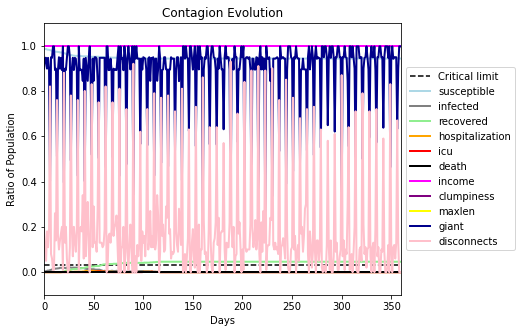

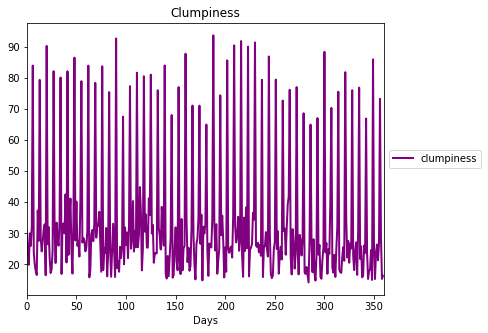

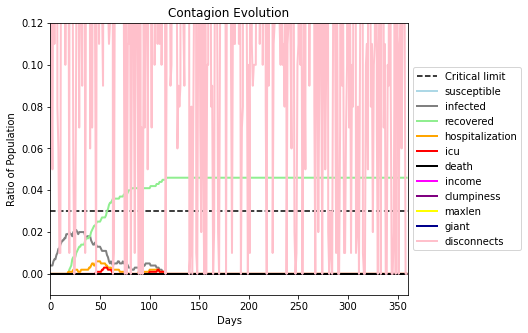

In [4]:
import logging
def setLevel(level):
    logger1 = logging.getLogger()
    logger1.setLevel(level)
params.params['temperature'] = -1
seeds = [9675]
setLevel(logging.CRITICAL)
multiple_runs(params,population_size,simulation_cycles,num_runs= num_runs,fname = run_prefix+"T-1", 
              do_print = True, 
              home_grid_height = 8, home_grid_width = 10, school_home_list = 

[
[
(0,0),(0,1),(0,2),(0,3),(0,4),
(0,5),(0,6),(0,7),(0,8),(0,9),
(1,0),(1,1),(1,2),(1,3),(1,4),
(1,5),(1,6),(1,7),(1,8),(1,9)],
[
(2,0),(2,1),(2,2),(2,3),(2,4),
(2,5),(2,6),(2,7),(2,8),(2,9),
(3,0),(3,1),(3,2),(3,3),(3,4),
(3,5),(3,6),(3,7),(3,8),(3,9)],
[
(4,0),(4,1),(4,2),(4,3),(4,4),
(4,5),(4,6),(4,7),(4,8),(4,9),
(5,0),(5,1),(5,2),(5,3),(5,4),
(5,5),(5,6),(5,7),(5,8),(5,9)],
[
(6,0),(6,1),(6,2),(6,3),(6,4),
(6,5),(6,6),(6,7),(6,8),(6,9),
(7,0),(7,1),(7,2),(7,3),(7,4),
(7,5),(7,6),(7,7),(7,8),(7,9)]
]

,work_home_list =     
[
[
(0,0),(0,1),(0,2),(0,3),(0,4),
(0,5),(0,6),(0,7),(0,8),(0,9),
(1,0),(1,1),(1,2),(1,3),(1,4),
(1,5),(1,6),(1,7),(1,8),(1,9),

(2,0),(2,1),(2,2),(2,3),(2,4),
(2,5),(2,6),(2,7),(2,8),(2,9),
(3,0),(3,1),(3,2),(3,3),(3,4),
(3,5),(3,6),(3,7),(3,8),(3,9),


(4,0),(4,1),(4,2),(4,3),(4,4),
(4,5),(4,6),(4,7),(4,8),(4,9),
(5,0),(5,1),(5,2),(5,3),(5,4),
(5,5),(5,6),(5,7),(5,8),(5,9),

(6,0),(6,1),(6,2),(6,3),(6,4),
(6,5),(6,6),(6,7),(6,8),(6,9),
(7,0),(7,1),(7,2),(7,3),(7,4),
(7,5),(7,6),(7,7),(7,8),(7,9)
]

],listeners = listeners, compute_hoprank = compute_hoprank )


Save these seeds if you want to rerun a scenario
[7995]
Average similarity between family members is 0.9934951109293961 at temperature -0.999
Average similarity between family and home is 0.9998806330981765 at temperature -1
Average similarity between students and their classroom is 0.8681882041759075 at temperature -0.999
Average classroom occupancy is 12.625 and number classrooms is 24
Average similarity between workers is 0.9984954335791298 at temperature -0.999
Average office occupancy is 10.063492063492063 and number offices is 63
Average friend similarity for adults: 0.9986057981617938 for kids: 0.9069739649576193
home_districts
[
Home (0,0) district with 1 Buildings
HomogeneousBuilding: 20 units (each with capacity for 5 people.) 0 allocated units with a total of 0 people.
Total of 0 people allocated in this district.
, 
Home (1,0) district with 1 Buildings
HomogeneousBuilding: 20 units (each with capacity for 5 people.) 3 allocated units with a total of 9 people.
Total of 9 peo

run with seed 7995:
avg restaurant similarity 0.5484280233396942
clumpiness 28.88
maxlen 36
giant component 0.94375
disconnects 0.12
avg restaurant similarity 0.6248010566069115
clumpiness 35.13
maxlen 44
giant component 0.8957609451007644
disconnects 0.15
avg restaurant similarity 0.6275407024711623
clumpiness 35.69
maxlen 51
giant component 0.8958333333333334
disconnects 0.18
avg restaurant similarity 0.6581611481778429
clumpiness 32.49
maxlen 43
giant component 0.94375
disconnects 0.15
avg restaurant similarity 0.5348850026568852
clumpiness 31.78
maxlen 39
giant component 0.8916666666666667
disconnects 0.16
avg restaurant similarity 0.6163192480384628
clumpiness 33.7
maxlen 53
giant component 0.8958333333333334
disconnects 0.14
avg restaurant similarity 0.5885941993162713
clumpiness 92.73
maxlen 19
giant component 0.26870007262164125
disconnects 0.92
avg restaurant similarity 0.6341203213981824
clumpiness 38.02
maxlen 47
giant component 0.8958333333333334
disconnects 0.24
avg restau

avg restaurant similarity 0.6416965163880898
clumpiness 35.69
maxlen 55
giant component 0.8958333333333334
disconnects 0.21
avg restaurant similarity 0.6955188231513486
clumpiness 40.21
maxlen 33
giant component 0.8430555555555556
disconnects 0.27
avg restaurant similarity 0.6405179183424219
clumpiness 95.28
maxlen 8
giant component 0.19172113289760348
disconnects 0.95
avg restaurant similarity 0.5716422388983979
clumpiness 21.38
maxlen 36
giant component 0.94375
disconnects 0.06
avg restaurant similarity 0.6303401646494926
clumpiness 28.74
maxlen 43
giant component 0.8957609451007644
disconnects 0.14
avg restaurant similarity 0.5388635985112541
clumpiness 41.13
maxlen 53
giant component 0.8958333333333334
disconnects 0.22
avg restaurant similarity 0.6598404509267577
clumpiness 44.24
maxlen 33
giant component 0.8430555555555556
disconnects 0.33
avg restaurant similarity 0.5037260691461586
clumpiness 36.19
maxlen 59
giant component 0.8958333333333334
disconnects 0.13
avg restaurant simi

clumpiness 40.67
maxlen 56
giant component 0.8958333333333334
disconnects 0.2
avg restaurant similarity 0.5567494755814967
clumpiness 34.96
maxlen 59
giant component 0.94375
disconnects 0.12
avg restaurant similarity 0.5492920670122083
clumpiness 47.52
maxlen 35
giant component 0.74375
disconnects 0.38
avg restaurant similarity 0.5730836029725127
clumpiness 43.1
maxlen 43
giant component 0.84375
disconnects 0.29
avg restaurant similarity 0.7031460200428562
clumpiness 36.7
maxlen 48
giant component 0.8957609451007644
disconnects 0.23
avg restaurant similarity 0.6251614718562809
clumpiness 92.61
maxlen 14
giant component 0.19026870007262164
disconnects 0.92
avg restaurant similarity 0.5543700762393549
clumpiness 40.73
maxlen 50
giant component 0.8958333333333334
disconnects 0.22
avg restaurant similarity 0.7450154361268635
clumpiness 25.66
maxlen 47
giant component 0.9437109103544128
disconnects 0.05
avg restaurant similarity 0.69388243113936
clumpiness 42.03
maxlen 45
giant component 0.

avg restaurant similarity 0.6160620220120129
clumpiness 90.07
maxlen 21
giant component 0.3151779230210603
disconnects 0.89
avg restaurant similarity 0.6657590743795496
clumpiness 54.33
maxlen 50
giant component 0.6956219596942321
disconnects 0.44
avg restaurant similarity 0.5926766488384829
clumpiness 34.44
maxlen 53
giant component 0.8930555555555556
disconnects 0.18
avg restaurant similarity 0.5700199551492934
clumpiness 35.09
maxlen 40
giant component 0.8929812369701181
disconnects 0.18
avg restaurant similarity 0.5322995413430588
clumpiness 24.32
maxlen 47
giant component 0.9409722222222222
disconnects 0.09
avg restaurant similarity 0.7427600754770519
clumpiness 39.92
maxlen 54
giant component 0.8930555555555556
disconnects 0.22
avg restaurant similarity 0.46578961712735245
clumpiness 36.94
maxlen 46
giant component 0.8930555555555556
disconnects 0.23
avg restaurant similarity 0.5810235980132561
clumpiness 94.61
maxlen 16
giant component 0.22730573710965868
disconnects 0.94
avg re

clumpiness 33.43
maxlen 45
giant component 0.8929812369701181
disconnects 0.18
avg restaurant similarity 0.6054971346295422
clumpiness 34.02
maxlen 50
giant component 0.9409722222222222
disconnects 0.12
avg restaurant similarity 0.5291468516674818
clumpiness 35.88
maxlen 36
giant component 0.8930555555555556
disconnects 0.23
avg restaurant similarity 0.6504845957544622
clumpiness 29.27
maxlen 40
giant component 0.8929812369701181
disconnects 0.13
avg restaurant similarity 0.4927546437526238
clumpiness 85.75
maxlen 18
giant component 0.2701525054466231
disconnects 0.84
avg restaurant similarity 0.6772809876890064
clumpiness 29.66
maxlen 51
giant component 0.9409722222222222
disconnects 0.1
avg restaurant similarity 0.4807958606550051
clumpiness 30.04
maxlen 47
giant component 0.8929812369701181
disconnects 0.13
avg restaurant similarity 0.5483068094720227
clumpiness 38.5
maxlen 41
giant component 0.8888888888888888
disconnects 0.21
avg restaurant similarity 0.5765521702501618
clumpiness

avg restaurant similarity 0.593033543588747
clumpiness 92.73
maxlen 14
giant component 0.2374727668845316
disconnects 0.92
avg restaurant similarity 0.5711541504286175
clumpiness 39.16
maxlen 54
giant component 0.8929812369701181
disconnects 0.23
avg restaurant similarity 0.5328851821437549
clumpiness 32.78
maxlen 50
giant component 0.9409722222222222
disconnects 0.12
avg restaurant similarity 0.6133251429256718
clumpiness 35.29
maxlen 48
giant component 0.8929812369701181
disconnects 0.19
avg restaurant similarity 0.5447753301797339
clumpiness 31.38
maxlen 35
giant component 0.8929812369701181
disconnects 0.16
avg restaurant similarity 0.5653373753312892
clumpiness 39.42
maxlen 48
giant component 0.8929812369701181
disconnects 0.24
avg restaurant similarity 0.5940386463929024
clumpiness 49.31
maxlen 53
giant component 0.8402777777777778
disconnects 0.33
avg restaurant similarity 0.5206341238182283
clumpiness 90.37
maxlen 24
giant component 0.31613372093023256
disconnects 0.89
avg rest

(<function dict.items>, <function dict.items>, <function dict.items>)

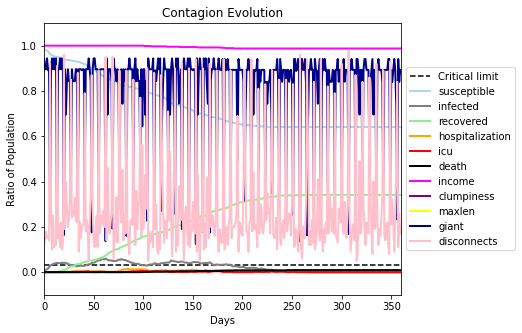

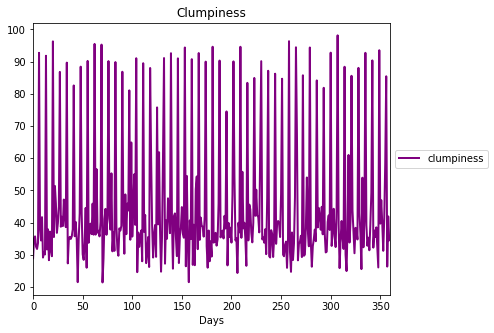

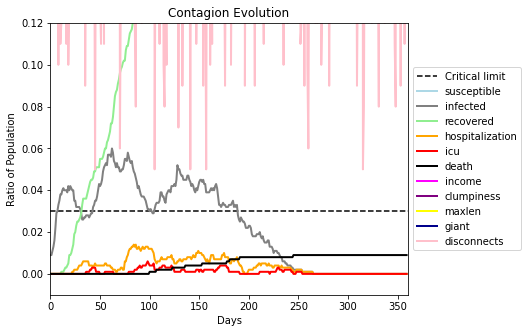

In [5]:
import logging
def setLevel(level):
    logger1 = logging.getLogger()
    logger1.setLevel(level)
params.params['temperature'] = -0.999
seeds = [9675]
setLevel(logging.CRITICAL)
multiple_runs(params,population_size,simulation_cycles,num_runs= num_runs,fname = run_prefix+"T-.999", 
              do_print = True, 
              home_grid_height = 8, home_grid_width = 10, school_home_list = 

[
[
(0,0),(0,1),(0,2),(0,3),(0,4),
(0,5),(0,6),(0,7),(0,8),(0,9),
(1,0),(1,1),(1,2),(1,3),(1,4),
(1,5),(1,6),(1,7),(1,8),(1,9)],
[
(2,0),(2,1),(2,2),(2,3),(2,4),
(2,5),(2,6),(2,7),(2,8),(2,9),
(3,0),(3,1),(3,2),(3,3),(3,4),
(3,5),(3,6),(3,7),(3,8),(3,9)],
[
(4,0),(4,1),(4,2),(4,3),(4,4),
(4,5),(4,6),(4,7),(4,8),(4,9),
(5,0),(5,1),(5,2),(5,3),(5,4),
(5,5),(5,6),(5,7),(5,8),(5,9)],
[
(6,0),(6,1),(6,2),(6,3),(6,4),
(6,5),(6,6),(6,7),(6,8),(6,9),
(7,0),(7,1),(7,2),(7,3),(7,4),
(7,5),(7,6),(7,7),(7,8),(7,9)]
]

,work_home_list =     
[
[
(0,0),(0,1),(0,2),(0,3),(0,4),
(0,5),(0,6),(0,7),(0,8),(0,9),
(1,0),(1,1),(1,2),(1,3),(1,4),
(1,5),(1,6),(1,7),(1,8),(1,9),

(2,0),(2,1),(2,2),(2,3),(2,4),
(2,5),(2,6),(2,7),(2,8),(2,9),
(3,0),(3,1),(3,2),(3,3),(3,4),
(3,5),(3,6),(3,7),(3,8),(3,9),


(4,0),(4,1),(4,2),(4,3),(4,4),
(4,5),(4,6),(4,7),(4,8),(4,9),
(5,0),(5,1),(5,2),(5,3),(5,4),
(5,5),(5,6),(5,7),(5,8),(5,9),

(6,0),(6,1),(6,2),(6,3),(6,4),
(6,5),(6,6),(6,7),(6,8),(6,9),
(7,0),(7,1),(7,2),(7,3),(7,4),
(7,5),(7,6),(7,7),(7,8),(7,9)
]

],listeners = listeners, compute_hoprank = compute_hoprank )


Save these seeds if you want to rerun a scenario
[4350]
Average similarity between family members is 0.9916547820279772 at temperature -0.998
Average similarity between family and home is 0.999904404368939 at temperature -1
Average similarity between students and their classroom is 0.6944751714433974 at temperature -0.998
Average classroom occupancy is 12 and number classrooms is 22
Average similarity between workers is 0.9996554791105717 at temperature -0.998
Average office occupancy is 10.53968253968254 and number offices is 63
Average friend similarity for adults: 0.9997399246914539 for kids: 0.8025560335319046
home_districts
[
Home (0,0) district with 1 Buildings
HomogeneousBuilding: 20 units (each with capacity for 5 people.) 1 allocated units with a total of 3 people.
Total of 3 people allocated in this district.
, 
Home (1,0) district with 1 Buildings
HomogeneousBuilding: 20 units (each with capacity for 5 people.) 0 allocated units with a total of 0 people.
Total of 0 people al

run with seed 4350:
avg restaurant similarity 0.6008426680963205
clumpiness 49.37
maxlen 21
giant component 0.7513774104683195
disconnects 0.42
avg restaurant similarity 0.672686992212288
clumpiness 56.15
maxlen 38
giant component 0.7024793388429752
disconnects 0.48
avg restaurant similarity 0.6779532150132743
clumpiness 44.27
maxlen 23
giant component 0.7513774104683195
disconnects 0.36
avg restaurant similarity 0.6415102486305062
clumpiness 41.39
maxlen 40
giant component 0.7513774104683195
disconnects 0.3
avg restaurant similarity 0.6490086496573042
clumpiness 37.85
maxlen 29
giant component 0.8505509641873278
disconnects 0.28
avg restaurant similarity 0.6602201203885355
clumpiness 53.66
maxlen 29
giant component 0.7024793388429752
disconnects 0.47
avg restaurant similarity 0.6402472169443669
clumpiness 85.06
maxlen 22
giant component 0.4326853851691865
disconnects 0.83
avg restaurant similarity 0.6371595521210733
clumpiness 47.95
maxlen 29
giant component 0.7513774104683195
disconn

clumpiness 54.96
maxlen 21
giant component 0.7024793388429752
disconnects 0.49
avg restaurant similarity 0.5002299383537244
clumpiness 61.65
maxlen 23
giant component 0.5950413223140496
disconnects 0.56
avg restaurant similarity 0.5887497134035264
clumpiness 57.68
maxlen 29
giant component 0.5950413223140496
disconnects 0.51
avg restaurant similarity 0.5624186039869222
clumpiness 83.29
maxlen 25
giant component 0.4132469402447804
disconnects 0.81
avg restaurant similarity 0.5644230052922542
clumpiness 51.58
maxlen 32
giant component 0.7513774104683195
disconnects 0.43
avg restaurant similarity 0.5995964420179928
clumpiness 41.71
maxlen 37
giant component 0.8505509641873278
disconnects 0.29
avg restaurant similarity 0.5214730216390533
clumpiness 42.88
maxlen 27
giant component 0.7513774104683195
disconnects 0.34
avg restaurant similarity 0.5227308992625297
clumpiness 42.31
maxlen 41
giant component 0.8505509641873278
disconnects 0.28
avg restaurant similarity 0.5073341405913512
clumpine

avg restaurant similarity 0.6132660868321923
clumpiness 51.91
maxlen 30
giant component 0.7513774104683195
disconnects 0.43
avg restaurant similarity 0.6040940811247256
clumpiness 48.93
maxlen 33
giant component 0.8023415977961432
disconnects 0.41
avg restaurant similarity 0.7028401734318244
clumpiness 61.38
maxlen 21
giant component 0.703168044077135
disconnects 0.56
avg restaurant similarity 0.5964997031898492
clumpiness 34.7
maxlen 30
giant component 0.8505509641873278
disconnects 0.22
avg restaurant similarity 0.5651652452193213
clumpiness 40.94
maxlen 35
giant component 0.8505509641873278
disconnects 0.28
avg restaurant similarity 0.6740458286874884
clumpiness 60.59
maxlen 28
giant component 0.5950413223140496
disconnects 0.53
avg restaurant similarity 0.6154378775478435
clumpiness 92.02
maxlen 18
giant component 0.21238300935925125
disconnects 0.91
avg restaurant similarity 0.6837527613079906
clumpiness 47.7
maxlen 25
giant component 0.7513774104683195
disconnects 0.39
avg restau

clumpiness 35.48
maxlen 28
giant component 0.8505509641873278
disconnects 0.25
avg restaurant similarity 0.5312417243485246
clumpiness 39.38
maxlen 32
giant component 0.8505509641873278
disconnects 0.3
avg restaurant similarity 0.530695032123331
clumpiness 37.56
maxlen 40
giant component 0.8505509641873278
disconnects 0.24
avg restaurant similarity 0.5359545051476128
clumpiness 87.31
maxlen 19
giant component 0.25125989920806335
disconnects 0.86
avg restaurant similarity 0.4711265624175579
clumpiness 46.3
maxlen 29
giant component 0.7513774104683195
disconnects 0.37
avg restaurant similarity 0.6706447461705224
clumpiness 37.11
maxlen 29
giant component 0.8505509641873278
disconnects 0.27
avg restaurant similarity 0.5772429950311263
clumpiness 41.48
maxlen 30
giant component 0.7506887052341598
disconnects 0.34
avg restaurant similarity 0.645806569122822
clumpiness 33.11
maxlen 30
giant component 0.8505509641873278
disconnects 0.22
avg restaurant similarity 0.6131275578147982
clumpiness 

avg restaurant similarity 0.6706749601215573
clumpiness 35.68
maxlen 28
giant component 0.8505509641873278
disconnects 0.24
avg restaurant similarity 0.663924403646005
clumpiness 45.6
maxlen 24
giant component 0.7513774104683195
disconnects 0.37
avg restaurant similarity 0.5643500371110485
clumpiness 38.36
maxlen 31
giant component 0.8505509641873278
disconnects 0.26
avg restaurant similarity 0.5660162721825331
clumpiness 44.82
maxlen 28
giant component 0.8023415977961432
disconnects 0.35
avg restaurant similarity 0.5777566253409173
clumpiness 53.12
maxlen 20
giant component 0.7513774104683195
disconnects 0.47
avg restaurant similarity 0.560901565012223
clumpiness 29.71
maxlen 29
giant component 0.8505509641873278
disconnects 0.19
avg restaurant similarity 0.6412128335892499
clumpiness 84.08
maxlen 23
giant component 0.44924406047516197
disconnects 0.82
avg restaurant similarity 0.5856602064231792
clumpiness 52.6
maxlen 29
giant component 0.7513774104683195
disconnects 0.45
avg restaur

clumpiness 46.75
maxlen 22
giant component 0.7513774104683195
disconnects 0.4
avg restaurant similarity 0.5163565195178981
clumpiness 37.36
maxlen 31
giant component 0.8505509641873278
disconnects 0.25
avg restaurant similarity 0.46845132970030995
clumpiness 42.78
maxlen 41
giant component 0.8505509641873278
disconnects 0.3
avg restaurant similarity 0.5533052235439088
clumpiness 80.63
maxlen 21
giant component 0.38660907127429806
disconnects 0.78
avg restaurant similarity 0.5722078237150133
clumpiness 35.11
maxlen 33
giant component 0.8505509641873278
disconnects 0.24
avg restaurant similarity 0.61394755179482
clumpiness 61.06
maxlen 37
giant component 0.7024793388429752
disconnects 0.52
avg restaurant similarity 0.47856404485429893
clumpiness 43.81
maxlen 26
giant component 0.7513774104683195
disconnects 0.35
avg restaurant similarity 0.5068492198829223
clumpiness 29.57
maxlen 33
giant component 0.8505509641873278
disconnects 0.18
avg restaurant similarity 0.5247184489648894
clumpines

(<function dict.items>, <function dict.items>, <function dict.items>)

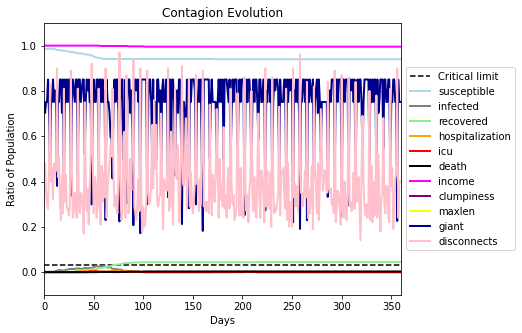

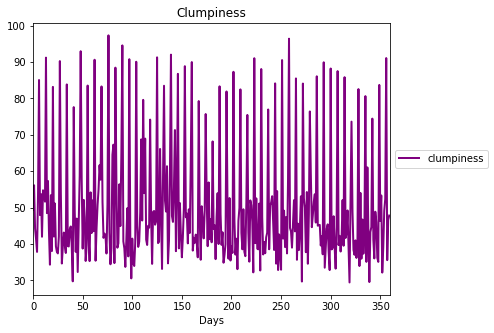

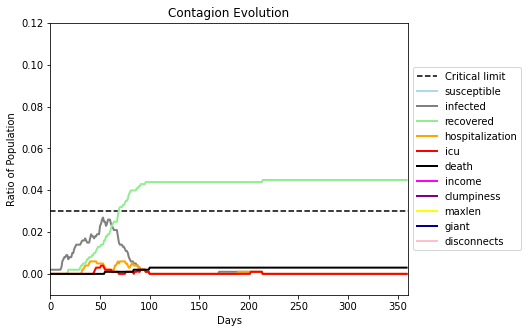

In [6]:
import logging
def setLevel(level):
    logger1 = logging.getLogger()
    logger1.setLevel(level)
params.params['temperature'] = -0.998
seeds = [9675]
setLevel(logging.CRITICAL)
multiple_runs(params,population_size,simulation_cycles,num_runs= num_runs,fname = run_prefix+"T-.998", 
              do_print = True, 
              home_grid_height = 8, home_grid_width = 10, school_home_list = 

[
[
(0,0),(0,1),(0,2),(0,3),(0,4),
(0,5),(0,6),(0,7),(0,8),(0,9),
(1,0),(1,1),(1,2),(1,3),(1,4),
(1,5),(1,6),(1,7),(1,8),(1,9)],
[
(2,0),(2,1),(2,2),(2,3),(2,4),
(2,5),(2,6),(2,7),(2,8),(2,9),
(3,0),(3,1),(3,2),(3,3),(3,4),
(3,5),(3,6),(3,7),(3,8),(3,9)],
[
(4,0),(4,1),(4,2),(4,3),(4,4),
(4,5),(4,6),(4,7),(4,8),(4,9),
(5,0),(5,1),(5,2),(5,3),(5,4),
(5,5),(5,6),(5,7),(5,8),(5,9)],
[
(6,0),(6,1),(6,2),(6,3),(6,4),
(6,5),(6,6),(6,7),(6,8),(6,9),
(7,0),(7,1),(7,2),(7,3),(7,4),
(7,5),(7,6),(7,7),(7,8),(7,9)]
]

,work_home_list =     
[
[
(0,0),(0,1),(0,2),(0,3),(0,4),
(0,5),(0,6),(0,7),(0,8),(0,9),
(1,0),(1,1),(1,2),(1,3),(1,4),
(1,5),(1,6),(1,7),(1,8),(1,9),

(2,0),(2,1),(2,2),(2,3),(2,4),
(2,5),(2,6),(2,7),(2,8),(2,9),
(3,0),(3,1),(3,2),(3,3),(3,4),
(3,5),(3,6),(3,7),(3,8),(3,9),


(4,0),(4,1),(4,2),(4,3),(4,4),
(4,5),(4,6),(4,7),(4,8),(4,9),
(5,0),(5,1),(5,2),(5,3),(5,4),
(5,5),(5,6),(5,7),(5,8),(5,9),

(6,0),(6,1),(6,2),(6,3),(6,4),
(6,5),(6,6),(6,7),(6,8),(6,9),
(7,0),(7,1),(7,2),(7,3),(7,4),
(7,5),(7,6),(7,7),(7,8),(7,9)
]

],listeners = listeners, compute_hoprank = compute_hoprank)


Save these seeds if you want to rerun a scenario
[7218]
Average similarity between family members is 0.9913508794809689 at temperature -0.9975
Average similarity between family and home is 0.9998951189414705 at temperature -1
Average similarity between students and their classroom is 0.8150704347552985 at temperature -0.9975
Average classroom occupancy is 11.541666666666666 and number classrooms is 24
Average similarity between workers is 0.9582574093231327 at temperature -0.9975
Average office occupancy is 10.34375 and number offices is 64
Average friend similarity for adults: 0.993950362572848 for kids: 0.8431440013184884
home_districts
[
Home (0,0) district with 1 Buildings
HomogeneousBuilding: 20 units (each with capacity for 5 people.) 0 allocated units with a total of 0 people.
Total of 0 people allocated in this district.
, 
Home (1,0) district with 1 Buildings
HomogeneousBuilding: 20 units (each with capacity for 5 people.) 0 allocated units with a total of 0 people.
Total of 0

run with seed 7218:
avg restaurant similarity 0.5769777568744837
clumpiness 17.57
maxlen 28
giant component 0.9986225895316805
disconnects 0.02
avg restaurant similarity 0.6635640641158328
clumpiness 16.45
maxlen 33
giant component 0.9986225895316805
disconnects 0.0
avg restaurant similarity 0.5733528405846573
clumpiness 17.63
maxlen 39
giant component 0.9986225895316805
disconnects 0.02
avg restaurant similarity 0.4759388256225806
clumpiness 19.17
maxlen 39
giant component 0.9986225895316805
disconnects 0.01
avg restaurant similarity 0.5068653760015701
clumpiness 18.29
maxlen 42
giant component 0.9986225895316805
disconnects 0.0
avg restaurant similarity 0.5485878796409261
clumpiness 18.28
maxlen 39
giant component 0.9986225895316805
disconnects 0.0
avg restaurant similarity 0.5868163508678401
clumpiness 82.46
maxlen 27
giant component 0.36095100864553314
disconnects 0.8
avg restaurant similarity 0.5296760791622727
clumpiness 15.67
maxlen 34
giant component 0.9986216402481047
disconne

clumpiness 16.97
maxlen 29
giant component 0.9986225895316805
disconnects 0.0
avg restaurant similarity 0.4824646717815156
clumpiness 17.49
maxlen 36
giant component 0.9986225895316805
disconnects 0.0
avg restaurant similarity 0.38833874105635824
clumpiness 17.32
maxlen 40
giant component 0.9986225895316805
disconnects 0.0
avg restaurant similarity 0.5618356808747438
clumpiness 88.59
maxlen 23
giant component 0.33285302593659943
disconnects 0.87
avg restaurant similarity 0.5157012359609402
clumpiness 15.37
maxlen 28
giant component 0.9986225895316805
disconnects 0.0
avg restaurant similarity 0.4242694326661857
clumpiness 15.86
maxlen 35
giant component 0.9986216402481047
disconnects 0.0
avg restaurant similarity 0.4368537223808437
clumpiness 15.98
maxlen 28
giant component 0.9986216402481047
disconnects 0.0
avg restaurant similarity 0.5017076225910478
clumpiness 16.3
maxlen 37
giant component 0.9986216402481047
disconnects 0.0
avg restaurant similarity 0.453272788849674
clumpiness 16.1

avg restaurant similarity 0.6207995167924553
clumpiness 17.77
maxlen 30
giant component 0.9986225895316805
disconnects 0.01
avg restaurant similarity 0.4749833405688849
clumpiness 15.98
maxlen 33
giant component 0.9986225895316805
disconnects 0.0
avg restaurant similarity 0.5622747892752059
clumpiness 16.83
maxlen 33
giant component 0.9986225895316805
disconnects 0.0
avg restaurant similarity 0.43381508868645285
clumpiness 16.66
maxlen 33
giant component 0.9986225895316805
disconnects 0.0
avg restaurant similarity 0.5199804184232438
clumpiness 14.98
maxlen 27
giant component 0.9986225895316805
disconnects 0.0
avg restaurant similarity 0.4982632409893594
clumpiness 18.33
maxlen 37
giant component 0.9986225895316805
disconnects 0.0
avg restaurant similarity 0.5191515920497087
clumpiness 87.59
maxlen 22
giant component 0.31988472622478387
disconnects 0.86
avg restaurant similarity 0.5157028954744162
clumpiness 16.09
maxlen 32
giant component 0.9986225895316805
disconnects 0.0
avg restaura

avg restaurant similarity 0.7001205107118965
clumpiness 25.43
maxlen 39
giant component 0.949724517906336
disconnects 0.1
avg restaurant similarity 0.5324292452168901
clumpiness 17.5
maxlen 37
giant component 0.9986225895316805
disconnects 0.01
avg restaurant similarity 0.6098958981500745
clumpiness 90.07
maxlen 15
giant component 0.22910662824207492
disconnects 0.89
avg restaurant similarity 0.6384794372560016
clumpiness 17.11
maxlen 31
giant component 0.9986225895316805
disconnects 0.01
avg restaurant similarity 0.6635867959525533
clumpiness 17.19
maxlen 32
giant component 0.9986225895316805
disconnects 0.0
avg restaurant similarity 0.5197544802544624
clumpiness 16.41
maxlen 33
giant component 0.9986216402481047
disconnects 0.0
avg restaurant similarity 0.5738400989536822
clumpiness 18.66
maxlen 39
giant component 0.9986225895316805
disconnects 0.0
avg restaurant similarity 0.5866767516647939
clumpiness 17.19
maxlen 37
giant component 0.9986225895316805
disconnects 0.01
avg restauran

avg restaurant similarity 0.5754501239305019
clumpiness 16.33
maxlen 37
giant component 0.9986225895316805
disconnects 0.0
avg restaurant similarity 0.4668041545014493
clumpiness 16.69
maxlen 33
giant component 0.9986225895316805
disconnects 0.0
avg restaurant similarity 0.45511920639274744
clumpiness 18.43
maxlen 42
giant component 0.9986225895316805
disconnects 0.01
avg restaurant similarity 0.3399495692288872
clumpiness 15.48
maxlen 29
giant component 0.9986225895316805
disconnects 0.0
avg restaurant similarity 0.43859652238068103
clumpiness 16.02
maxlen 38
giant component 0.9986225895316805
disconnects 0.0
avg restaurant similarity 0.4300189124001674
clumpiness 90.22
maxlen 23
giant component 0.26945244956772335
disconnects 0.89
avg restaurant similarity 0.5527693829634408
clumpiness 16.62
maxlen 29
giant component 0.9986216402481047
disconnects 0.0
avg restaurant similarity 0.36559604909731724
clumpiness 25.76
maxlen 35
giant component 0.9496898690558235
disconnects 0.11
avg resta

avg restaurant similarity 0.5932978069080831
clumpiness 13.87
maxlen 31
giant component 0.9986225895316805
disconnects 0.0
avg restaurant similarity 0.4525237555048367
clumpiness 84.58
maxlen 38
giant component 0.5172910662824207
disconnects 0.81
avg restaurant similarity 0.47365994354983304
clumpiness 17.98
maxlen 31
giant component 0.9986225895316805
disconnects 0.03
avg restaurant similarity 0.5129519947558714
clumpiness 16.21
maxlen 31
giant component 0.9986225895316805
disconnects 0.0
avg restaurant similarity 0.5220426852457104
clumpiness 20.85
maxlen 28
giant component 0.9490358126721763
disconnects 0.07
avg restaurant similarity 0.6234765855090285
clumpiness 15.86
maxlen 29
giant component 0.9986225895316805
disconnects 0.0
avg restaurant similarity 0.5025363731897907
clumpiness 15.16
maxlen 27
giant component 0.9986225895316805
disconnects 0.0
avg restaurant similarity 0.727082695545668
clumpiness 19.0
maxlen 37
giant component 0.9986225895316805
disconnects 0.0
avg restaurant

(<function dict.items>, <function dict.items>, <function dict.items>)

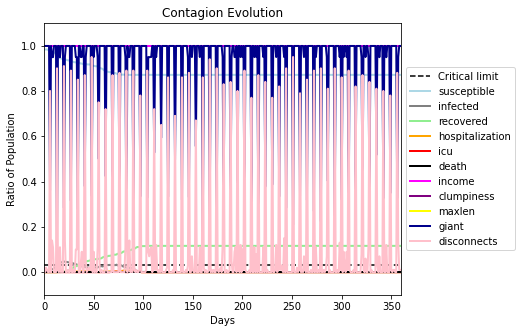

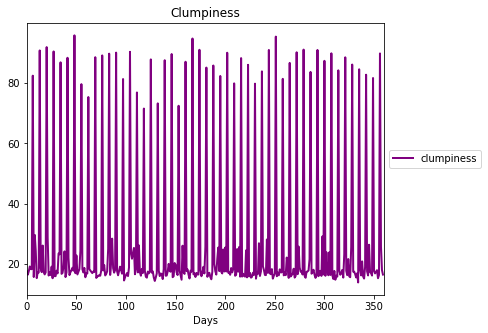

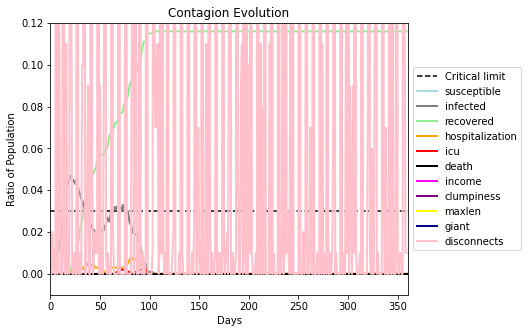

In [7]:
import logging
def setLevel(level):
    logger1 = logging.getLogger()
    logger1.setLevel(level)
params.params['temperature'] = -0.9975
seeds = [9675]
setLevel(logging.CRITICAL)
multiple_runs(params,population_size,simulation_cycles,num_runs= num_runs,fname = run_prefix+"T-.9975", 
              do_print = True, 
              home_grid_height = 8, home_grid_width = 10, school_home_list = 

[
[
(0,0),(0,1),(0,2),(0,3),(0,4),
(0,5),(0,6),(0,7),(0,8),(0,9),
(1,0),(1,1),(1,2),(1,3),(1,4),
(1,5),(1,6),(1,7),(1,8),(1,9)],
[
(2,0),(2,1),(2,2),(2,3),(2,4),
(2,5),(2,6),(2,7),(2,8),(2,9),
(3,0),(3,1),(3,2),(3,3),(3,4),
(3,5),(3,6),(3,7),(3,8),(3,9)],
[
(4,0),(4,1),(4,2),(4,3),(4,4),
(4,5),(4,6),(4,7),(4,8),(4,9),
(5,0),(5,1),(5,2),(5,3),(5,4),
(5,5),(5,6),(5,7),(5,8),(5,9)],
[
(6,0),(6,1),(6,2),(6,3),(6,4),
(6,5),(6,6),(6,7),(6,8),(6,9),
(7,0),(7,1),(7,2),(7,3),(7,4),
(7,5),(7,6),(7,7),(7,8),(7,9)]
]

,work_home_list =     
[
[
(0,0),(0,1),(0,2),(0,3),(0,4),
(0,5),(0,6),(0,7),(0,8),(0,9),
(1,0),(1,1),(1,2),(1,3),(1,4),
(1,5),(1,6),(1,7),(1,8),(1,9),

(2,0),(2,1),(2,2),(2,3),(2,4),
(2,5),(2,6),(2,7),(2,8),(2,9),
(3,0),(3,1),(3,2),(3,3),(3,4),
(3,5),(3,6),(3,7),(3,8),(3,9),


(4,0),(4,1),(4,2),(4,3),(4,4),
(4,5),(4,6),(4,7),(4,8),(4,9),
(5,0),(5,1),(5,2),(5,3),(5,4),
(5,5),(5,6),(5,7),(5,8),(5,9),

(6,0),(6,1),(6,2),(6,3),(6,4),
(6,5),(6,6),(6,7),(6,8),(6,9),
(7,0),(7,1),(7,2),(7,3),(7,4),
(7,5),(7,6),(7,7),(7,8),(7,9)
]

],listeners = listeners, compute_hoprank= compute_hoprank)


Save these seeds if you want to rerun a scenario
[5200]
Average similarity between family members is 0.9875812455572531 at temperature -0.997
Average similarity between family and home is 0.9998864194062173 at temperature -1
Average similarity between students and their classroom is 0.665855255751711 at temperature -0.997
Average classroom occupancy is 12.708333333333334 and number classrooms is 24
Average similarity between workers is 0.9468304505311813 at temperature -0.997
Average office occupancy is 9.953125 and number offices is 64
Average friend similarity for adults: 0.991485132521473 for kids: 0.7538429881471159
home_districts
[
Home (0,0) district with 1 Buildings
HomogeneousBuilding: 20 units (each with capacity for 5 people.) 0 allocated units with a total of 0 people.
Total of 0 people allocated in this district.
, 
Home (1,0) district with 1 Buildings
HomogeneousBuilding: 20 units (each with capacity for 5 people.) 0 allocated units with a total of 0 people.
Total of 0 peo

run with seed 5200:
avg restaurant similarity 0.63170869990127
clumpiness 13.92
maxlen 30
giant component 0.9937759336099585
disconnects 0.0
avg restaurant similarity 0.5455772726861832
clumpiness 14.69
maxlen 28
giant component 0.9937759336099585
disconnects 0.02
avg restaurant similarity 0.5961014118934395
clumpiness 15.62
maxlen 34
giant component 0.9937759336099585
disconnects 0.01
avg restaurant similarity 0.5058541202278465
clumpiness 14.49
maxlen 23
giant component 0.9937759336099585
disconnects 0.01
avg restaurant similarity 0.4918288496073639
clumpiness 12.52
maxlen 26
giant component 0.9937759336099585
disconnects 0.0
avg restaurant similarity 0.5636676744318138
clumpiness 12.4
maxlen 24
giant component 0.9937759336099585
disconnects 0.0
avg restaurant similarity 0.5270400339186688
clumpiness 63.35
maxlen 23
giant component 0.6620839363241678
disconnects 0.57
avg restaurant similarity 0.6570357640655844
clumpiness 13.96
maxlen 35
giant component 0.9937759336099585
disconnects

clumpiness 13.97
maxlen 33
giant component 0.9937759336099585
disconnects 0.0
avg restaurant similarity 0.5591310935848005
clumpiness 14.35
maxlen 28
giant component 0.9937759336099585
disconnects 0.02
avg restaurant similarity 0.6811247145902464
clumpiness 15.0
maxlen 29
giant component 0.9937716262975779
disconnects 0.02
avg restaurant similarity 0.6095131706482302
clumpiness 60.68
maxlen 27
giant component 0.658465991316932
disconnects 0.55
avg restaurant similarity 0.6551787382366324
clumpiness 14.51
maxlen 22
giant component 0.9937759336099585
disconnects 0.01
avg restaurant similarity 0.6341922247796947
clumpiness 14.94
maxlen 30
giant component 0.9937759336099585
disconnects 0.0
avg restaurant similarity 0.8106087559722065
clumpiness 15.3
maxlen 27
giant component 0.9937759336099585
disconnects 0.02
avg restaurant similarity 0.6616581629506089
clumpiness 14.22
maxlen 28
giant component 0.9937759336099585
disconnects 0.01
avg restaurant similarity 0.6015220194604205
clumpiness 13

avg restaurant similarity 0.6941358673631958
clumpiness 17.71
maxlen 30
giant component 0.9937759336099585
disconnects 0.02
avg restaurant similarity 0.6461817726892785
clumpiness 13.72
maxlen 24
giant component 0.9937759336099585
disconnects 0.01
avg restaurant similarity 0.6613831283715633
clumpiness 16.19
maxlen 27
giant component 0.9937759336099585
disconnects 0.03
avg restaurant similarity 0.6224082667350533
clumpiness 17.09
maxlen 31
giant component 0.9937673130193906
disconnects 0.02
avg restaurant similarity 0.6410764855910587
clumpiness 15.22
maxlen 23
giant component 0.9937759336099585
disconnects 0.03
avg restaurant similarity 0.5999982051830985
clumpiness 12.31
maxlen 21
giant component 0.9937759336099585
disconnects 0.0
avg restaurant similarity 0.5060802059175277
clumpiness 69.85
maxlen 33
giant component 0.5506512301013025
disconnects 0.65
avg restaurant similarity 0.6342260397196451
clumpiness 17.36
maxlen 36
giant component 0.9937759336099585
disconnects 0.02
avg resta

clumpiness 13.89
maxlen 26
giant component 0.9937759336099585
disconnects 0.01
avg restaurant similarity 0.6353063319090069
clumpiness 15.5
maxlen 32
giant component 0.9937716262975779
disconnects 0.01
avg restaurant similarity 0.6518329724394714
clumpiness 13.5
maxlen 25
giant component 0.9937759336099585
disconnects 0.0
avg restaurant similarity 0.6055986155303286
clumpiness 75.86
maxlen 25
giant component 0.5629522431259045
disconnects 0.72
avg restaurant similarity 0.6400829486508465
clumpiness 16.0
maxlen 37
giant component 0.9937759336099585
disconnects 0.01
avg restaurant similarity 0.7037980315106919
clumpiness 16.31
maxlen 32
giant component 0.9937759336099585
disconnects 0.02
avg restaurant similarity 0.578305034190627
clumpiness 15.55
maxlen 31
giant component 0.9937759336099585
disconnects 0.01
avg restaurant similarity 0.6590656889136371
clumpiness 16.69
maxlen 33
giant component 0.9937759336099585
disconnects 0.02
avg restaurant similarity 0.593829985036874
clumpiness 13.

avg restaurant similarity 0.6407361441756234
clumpiness 18.18
maxlen 33
giant component 0.9937759336099585
disconnects 0.04
avg restaurant similarity 0.6490519399780438
clumpiness 15.19
maxlen 33
giant component 0.9937759336099585
disconnects 0.01
avg restaurant similarity 0.6028870551924955
clumpiness 13.61
maxlen 27
giant component 0.9937759336099585
disconnects 0.0
avg restaurant similarity 0.6008498592345577
clumpiness 13.92
maxlen 27
giant component 0.9937759336099585
disconnects 0.0
avg restaurant similarity 0.5512883498253434
clumpiness 17.75
maxlen 27
giant component 0.9937759336099585
disconnects 0.04
avg restaurant similarity 0.6793486323106434
clumpiness 13.97
maxlen 24
giant component 0.9937759336099585
disconnects 0.0
avg restaurant similarity 0.6657572714203295
clumpiness 66.96
maxlen 20
giant component 0.5723589001447178
disconnects 0.62
avg restaurant similarity 0.5315498224262345
clumpiness 14.34
maxlen 25
giant component 0.9937759336099585
disconnects 0.01
avg restaur

clumpiness 15.04
maxlen 29
giant component 0.9937759336099585
disconnects 0.01
avg restaurant similarity 0.5498337143885784
clumpiness 14.85
maxlen 31
giant component 0.9937759336099585
disconnects 0.01
avg restaurant similarity 0.5103084243828757
clumpiness 13.56
maxlen 27
giant component 0.9937759336099585
disconnects 0.01
avg restaurant similarity 0.7479062018390196
clumpiness 79.85
maxlen 21
giant component 0.557163531114327
disconnects 0.77
avg restaurant similarity 0.5936986557333124
clumpiness 14.3
maxlen 33
giant component 0.9937759336099585
disconnects 0.0
avg restaurant similarity 0.7014325268473325
clumpiness 14.24
maxlen 27
giant component 0.9937759336099585
disconnects 0.0
avg restaurant similarity 0.656556949020302
clumpiness 13.29
maxlen 24
giant component 0.9937759336099585
disconnects 0.0
avg restaurant similarity 0.6270089580128172
clumpiness 14.37
maxlen 23
giant component 0.9937759336099585
disconnects 0.01
avg restaurant similarity 0.5561440188571476
clumpiness 17.

(<function dict.items>, <function dict.items>, <function dict.items>)

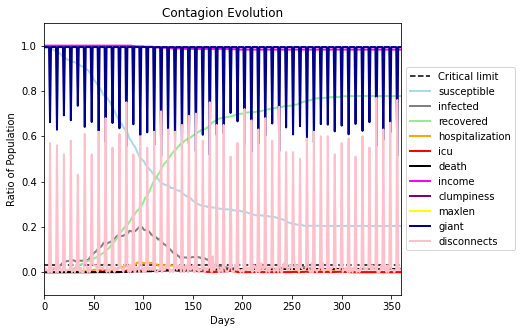

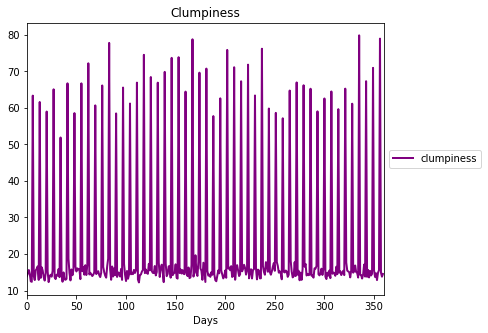

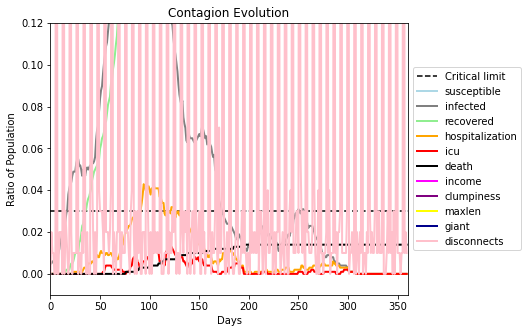

In [8]:
import logging
def setLevel(level):
    logger1 = logging.getLogger()
    logger1.setLevel(level)
params.params['temperature'] = -0.997
seeds = [9675]
setLevel(logging.CRITICAL)
multiple_runs(params,population_size,simulation_cycles,num_runs= num_runs,fname = run_prefix+"T-.997", 
              do_print = True, 
              home_grid_height = 8, home_grid_width = 10, school_home_list = 

[
[
(0,0),(0,1),(0,2),(0,3),(0,4),
(0,5),(0,6),(0,7),(0,8),(0,9),
(1,0),(1,1),(1,2),(1,3),(1,4),
(1,5),(1,6),(1,7),(1,8),(1,9)],
[
(2,0),(2,1),(2,2),(2,3),(2,4),
(2,5),(2,6),(2,7),(2,8),(2,9),
(3,0),(3,1),(3,2),(3,3),(3,4),
(3,5),(3,6),(3,7),(3,8),(3,9)],
[
(4,0),(4,1),(4,2),(4,3),(4,4),
(4,5),(4,6),(4,7),(4,8),(4,9),
(5,0),(5,1),(5,2),(5,3),(5,4),
(5,5),(5,6),(5,7),(5,8),(5,9)],
[
(6,0),(6,1),(6,2),(6,3),(6,4),
(6,5),(6,6),(6,7),(6,8),(6,9),
(7,0),(7,1),(7,2),(7,3),(7,4),
(7,5),(7,6),(7,7),(7,8),(7,9)]
]

,work_home_list =     
[
[
(0,0),(0,1),(0,2),(0,3),(0,4),
(0,5),(0,6),(0,7),(0,8),(0,9),
(1,0),(1,1),(1,2),(1,3),(1,4),
(1,5),(1,6),(1,7),(1,8),(1,9),

(2,0),(2,1),(2,2),(2,3),(2,4),
(2,5),(2,6),(2,7),(2,8),(2,9),
(3,0),(3,1),(3,2),(3,3),(3,4),
(3,5),(3,6),(3,7),(3,8),(3,9),


(4,0),(4,1),(4,2),(4,3),(4,4),
(4,5),(4,6),(4,7),(4,8),(4,9),
(5,0),(5,1),(5,2),(5,3),(5,4),
(5,5),(5,6),(5,7),(5,8),(5,9),

(6,0),(6,1),(6,2),(6,3),(6,4),
(6,5),(6,6),(6,7),(6,8),(6,9),
(7,0),(7,1),(7,2),(7,3),(7,4),
(7,5),(7,6),(7,7),(7,8),(7,9)
]

],listeners = listeners, compute_hoprank = compute_hoprank)


Save these seeds if you want to rerun a scenario
[9741]
Average similarity between family members is 0.9871775498382056 at temperature -0.996
Average similarity between family and home is 0.9998920936699093 at temperature -1
Average similarity between students and their classroom is 0.6054055592088824 at temperature -0.996
Average classroom occupancy is 12.130434782608695 and number classrooms is 23
Average similarity between workers is 0.9746756500349574 at temperature -0.996
Average office occupancy is 10.212121212121213 and number offices is 66
Average friend similarity for adults: 0.9933180884137108 for kids: 0.742051292863805
home_districts
[
Home (0,0) district with 1 Buildings
HomogeneousBuilding: 20 units (each with capacity for 5 people.) 2 allocated units with a total of 6 people.
Total of 6 people allocated in this district.
, 
Home (1,0) district with 1 Buildings
HomogeneousBuilding: 20 units (each with capacity for 5 people.) 0 allocated units with a total of 0 people.
Tot

run with seed 9741:
avg restaurant similarity 0.5156628309370737
clumpiness 12.52
maxlen 21
giant component 1.0
disconnects 0.0
avg restaurant similarity 0.6617355867994089
clumpiness 12.21
maxlen 28
giant component 1.0
disconnects 0.0
avg restaurant similarity 0.6848289724841519
clumpiness 13.52
maxlen 26
giant component 1.0
disconnects 0.0
avg restaurant similarity 0.5779896173011007
clumpiness 13.16
maxlen 23
giant component 1.0
disconnects 0.0
avg restaurant similarity 0.5407369342297407
clumpiness 13.56
maxlen 24
giant component 1.0
disconnects 0.0
avg restaurant similarity 0.7421822938168544
clumpiness 13.69
maxlen 23
giant component 1.0
disconnects 0.0
avg restaurant similarity 0.6848592998296638
clumpiness 62.73
maxlen 28
giant component 0.6544011544011544
disconnects 0.56
avg restaurant similarity 0.8831268022322635
clumpiness 13.89
maxlen 24
giant component 1.0
disconnects 0.0
avg restaurant similarity 0.5751989170003001
clumpiness 13.37
maxlen 22
giant component 1.0
disconne

clumpiness 12.84
maxlen 22
giant component 1.0
disconnects 0.0
avg restaurant similarity 0.6178512039989356
clumpiness 13.93
maxlen 25
giant component 1.0
disconnects 0.0
avg restaurant similarity 0.7137514796328248
clumpiness 75.94
maxlen 31
giant component 0.5187590187590188
disconnects 0.71
avg restaurant similarity 0.5470544647783315
clumpiness 12.15
maxlen 22
giant component 1.0
disconnects 0.0
avg restaurant similarity 0.7843526420615131
clumpiness 13.88
maxlen 24
giant component 1.0
disconnects 0.0
avg restaurant similarity 0.46461926993343894
clumpiness 12.99
maxlen 28
giant component 1.0
disconnects 0.0
avg restaurant similarity 0.6545084697056996
clumpiness 14.01
maxlen 23
giant component 1.0
disconnects 0.0
avg restaurant similarity 0.7613605464495111
clumpiness 13.82
maxlen 25
giant component 1.0
disconnects 0.0
avg restaurant similarity 0.6876192350166709
clumpiness 14.1
maxlen 25
giant component 1.0
disconnects 0.0
avg restaurant similarity 0.64461013096082
clumpiness 70.

avg restaurant similarity 0.7711727935064905
clumpiness 13.72
maxlen 28
giant component 0.9986225895316805
disconnects 0.0
avg restaurant similarity 0.6117470023974301
clumpiness 70.07
maxlen 25
giant component 0.5959595959595959
disconnects 0.65
avg restaurant similarity 0.6254600938635481
clumpiness 13.84
maxlen 25
giant component 0.9986225895316805
disconnects 0.01
avg restaurant similarity 0.42452661825632876
clumpiness 14.31
maxlen 26
giant component 0.9986216402481047
disconnects 0.0
avg restaurant similarity 0.6420156095134726
clumpiness 13.17
maxlen 28
giant component 0.9986225895316805
disconnects 0.0
avg restaurant similarity 0.42678872907901755
clumpiness 15.08
maxlen 23
giant component 0.9986216402481047
disconnects 0.01
avg restaurant similarity 0.7077113137413793
clumpiness 13.69
maxlen 22
giant component 0.9986225895316805
disconnects 0.0
avg restaurant similarity 0.6202723615342238
clumpiness 14.76
maxlen 24
giant component 0.9986225895316805
disconnects 0.01
avg restau

avg restaurant similarity 0.6509972258752329
clumpiness 13.67
maxlen 22
giant component 0.9986225895316805
disconnects 0.0
avg restaurant similarity 0.5932777978332828
clumpiness 13.61
maxlen 24
giant component 0.9986225895316805
disconnects 0.0
avg restaurant similarity 0.6149592672154106
clumpiness 12.42
maxlen 25
giant component 0.9986225895316805
disconnects 0.0
avg restaurant similarity 0.6958591234319315
clumpiness 13.14
maxlen 25
giant component 0.9986225895316805
disconnects 0.0
avg restaurant similarity 0.4594724307674861
clumpiness 69.68
maxlen 34
giant component 0.5988455988455988
disconnects 0.64
avg restaurant similarity 0.5293061438913838
clumpiness 13.46
maxlen 22
giant component 0.9986225895316805
disconnects 0.01
avg restaurant similarity 0.667417669270252
clumpiness 13.44
maxlen 23
giant component 0.9986225895316805
disconnects 0.0
avg restaurant similarity 0.6768842388207635
clumpiness 12.79
maxlen 21
giant component 0.9986225895316805
disconnects 0.0
avg restaurant 

avg restaurant similarity 0.6871963056598279
clumpiness 67.83
maxlen 21
giant component 0.6298701298701299
disconnects 0.63
avg restaurant similarity 0.6127743066709964
clumpiness 12.51
maxlen 22
giant component 0.9986225895316805
disconnects 0.0
avg restaurant similarity 0.6191891492600395
clumpiness 12.88
maxlen 24
giant component 0.9986225895316805
disconnects 0.0
avg restaurant similarity 0.7230700829612751
clumpiness 14.69
maxlen 26
giant component 0.9986225895316805
disconnects 0.01
avg restaurant similarity 0.5892222960593638
clumpiness 11.84
maxlen 25
giant component 0.9986225895316805
disconnects 0.0
avg restaurant similarity 0.6488910123055054
clumpiness 12.83
maxlen 24
giant component 0.9986225895316805
disconnects 0.0
avg restaurant similarity 0.6710459530205137
clumpiness 13.82
maxlen 23
giant component 0.9986225895316805
disconnects 0.0
avg restaurant similarity 0.6265251815282354
clumpiness 60.44
maxlen 40
giant component 0.6854256854256854
disconnects 0.52
avg restauran

avg restaurant similarity 0.6533135807682299
clumpiness 15.29
maxlen 22
giant component 0.9986225895316805
disconnects 0.02
avg restaurant similarity 0.7297096272822884
clumpiness 13.81
maxlen 25
giant component 0.9986225895316805
disconnects 0.0
avg restaurant similarity 0.6851235506709618
clumpiness 13.19
maxlen 22
giant component 0.9986225895316805
disconnects 0.0
avg restaurant similarity 0.5186574683925729
clumpiness 78.73
maxlen 23
giant component 0.4357864357864358
disconnects 0.76
avg restaurant similarity 0.5981321828432854
clumpiness 13.83
maxlen 28
giant component 0.9986225895316805
disconnects 0.0
avg restaurant similarity 0.5777650145261378
clumpiness 13.27
maxlen 27
giant component 0.9986225895316805
disconnects 0.01
avg restaurant similarity 0.6794419660830663
clumpiness 14.17
maxlen 21
giant component 0.9986225895316805
disconnects 0.01
avg restaurant similarity 0.6346916359257863
clumpiness 14.0
maxlen 27
giant component 0.9986225895316805
disconnects 0.0
avg restauran

(<function dict.items>, <function dict.items>, <function dict.items>)

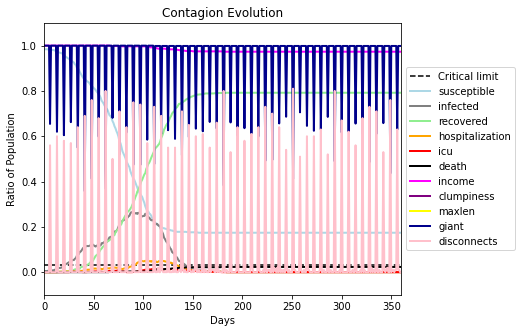

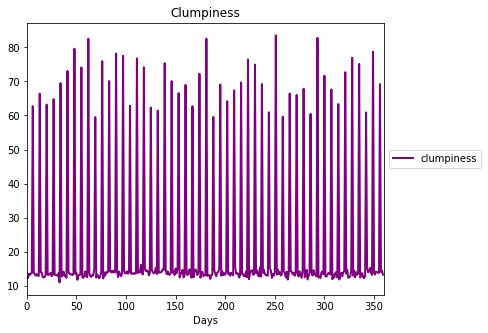

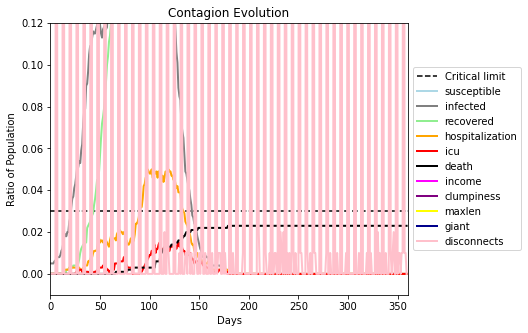

In [9]:
import logging
def setLevel(level):
    logger1 = logging.getLogger()
    logger1.setLevel(level)
params.params['temperature'] = -0.996
seeds = [9675]
setLevel(logging.CRITICAL)
multiple_runs(params,population_size,simulation_cycles,num_runs= num_runs,fname = run_prefix+"T-.996", 
              do_print = True, 
              home_grid_height = 8, home_grid_width = 10, school_home_list = 

[
[
(0,0),(0,1),(0,2),(0,3),(0,4),
(0,5),(0,6),(0,7),(0,8),(0,9),
(1,0),(1,1),(1,2),(1,3),(1,4),
(1,5),(1,6),(1,7),(1,8),(1,9)],
[
(2,0),(2,1),(2,2),(2,3),(2,4),
(2,5),(2,6),(2,7),(2,8),(2,9),
(3,0),(3,1),(3,2),(3,3),(3,4),
(3,5),(3,6),(3,7),(3,8),(3,9)],
[
(4,0),(4,1),(4,2),(4,3),(4,4),
(4,5),(4,6),(4,7),(4,8),(4,9),
(5,0),(5,1),(5,2),(5,3),(5,4),
(5,5),(5,6),(5,7),(5,8),(5,9)],
[
(6,0),(6,1),(6,2),(6,3),(6,4),
(6,5),(6,6),(6,7),(6,8),(6,9),
(7,0),(7,1),(7,2),(7,3),(7,4),
(7,5),(7,6),(7,7),(7,8),(7,9)]
]

,work_home_list =     
[
[
(0,0),(0,1),(0,2),(0,3),(0,4),
(0,5),(0,6),(0,7),(0,8),(0,9),
(1,0),(1,1),(1,2),(1,3),(1,4),
(1,5),(1,6),(1,7),(1,8),(1,9),

(2,0),(2,1),(2,2),(2,3),(2,4),
(2,5),(2,6),(2,7),(2,8),(2,9),
(3,0),(3,1),(3,2),(3,3),(3,4),
(3,5),(3,6),(3,7),(3,8),(3,9),


(4,0),(4,1),(4,2),(4,3),(4,4),
(4,5),(4,6),(4,7),(4,8),(4,9),
(5,0),(5,1),(5,2),(5,3),(5,4),
(5,5),(5,6),(5,7),(5,8),(5,9),

(6,0),(6,1),(6,2),(6,3),(6,4),
(6,5),(6,6),(6,7),(6,8),(6,9),
(7,0),(7,1),(7,2),(7,3),(7,4),
(7,5),(7,6),(7,7),(7,8),(7,9)
]

],listeners = listeners, compute_hoprank = compute_hoprank)


Save these seeds if you want to rerun a scenario
[1930]
Average similarity between family members is 0.987342811555138 at temperature -0.995
Average similarity between family and home is 0.9999059079941336 at temperature -1
Average similarity between students and their classroom is 0.6302299119642714 at temperature -0.995
Average classroom occupancy is 12.208333333333334 and number classrooms is 24
Average similarity between workers is 0.9675400629306545 at temperature -0.995
Average office occupancy is 9.727272727272727 and number offices is 66
Average friend similarity for adults: 0.9889892811913162 for kids: 0.7389641618942165
home_districts
[
Home (0,0) district with 1 Buildings
HomogeneousBuilding: 20 units (each with capacity for 5 people.) 0 allocated units with a total of 0 people.
Total of 0 people allocated in this district.
, 
Home (1,0) district with 1 Buildings
HomogeneousBuilding: 20 units (each with capacity for 5 people.) 1 allocated units with a total of 3 people.
Tota

run with seed 1930:
avg restaurant similarity 0.5888711348446406
clumpiness 12.85
maxlen 26
giant component 0.9986091794158554
disconnects 0.0
avg restaurant similarity 0.41916469213521723
clumpiness 13.99
maxlen 23
giant component 0.9986091794158554
disconnects 0.01
avg restaurant similarity 0.5765497705517775
clumpiness 12.16
maxlen 25
giant component 0.9986091794158554
disconnects 0.0
avg restaurant similarity 0.4306807490133655
clumpiness 13.47
maxlen 27
giant component 0.9986091794158554
disconnects 0.0
avg restaurant similarity 0.44996298419078967
clumpiness 13.79
maxlen 25
giant component 0.9986091794158554
disconnects 0.0
avg restaurant similarity 0.6284487270977291
clumpiness 14.32
maxlen 25
giant component 0.9986091794158554
disconnects 0.0
avg restaurant similarity 0.6599809908405427
clumpiness 61.85
maxlen 29
giant component 0.6552478134110787
disconnects 0.54
avg restaurant similarity 0.5156995311453683
clumpiness 13.66
maxlen 24
giant component 0.9986091794158554
disconne

clumpiness 13.53
maxlen 25
giant component 0.9986091794158554
disconnects 0.0
avg restaurant similarity 0.5134481742265607
clumpiness 13.52
maxlen 23
giant component 0.9986091794158554
disconnects 0.01
avg restaurant similarity 0.5273402359808923
clumpiness 14.95
maxlen 27
giant component 0.9986091794158554
disconnects 0.01
avg restaurant similarity 0.5523106233227325
clumpiness 63.25
maxlen 26
giant component 0.6501457725947521
disconnects 0.57
avg restaurant similarity 0.4645913307457256
clumpiness 14.15
maxlen 26
giant component 0.9986091794158554
disconnects 0.0
avg restaurant similarity 0.45123227718827824
clumpiness 13.12
maxlen 23
giant component 0.9986091794158554
disconnects 0.0
avg restaurant similarity 0.4968473758020312
clumpiness 13.82
maxlen 23
giant component 0.9986091794158554
disconnects 0.01
avg restaurant similarity 0.5799731915047442
clumpiness 13.84
maxlen 22
giant component 0.9986091794158554
disconnects 0.01
avg restaurant similarity 0.4608534193434493
clumpiness

avg restaurant similarity 0.5636263862292311
clumpiness 14.63
maxlen 24
giant component 0.9972183588317107
disconnects 0.01
avg restaurant similarity 0.5757722106272856
clumpiness 13.58
maxlen 26
giant component 0.9972183588317107
disconnects 0.0
avg restaurant similarity 0.5086246673431013
clumpiness 14.2
maxlen 23
giant component 0.9972183588317107
disconnects 0.01
avg restaurant similarity 0.49602093643989226
clumpiness 13.73
maxlen 23
giant component 0.9972183588317107
disconnects 0.0
avg restaurant similarity 0.48164525808174663
clumpiness 14.44
maxlen 25
giant component 0.9972183588317107
disconnects 0.01
avg restaurant similarity 0.5994202119758884
clumpiness 15.37
maxlen 29
giant component 0.9972183588317107
disconnects 0.02
avg restaurant similarity 0.5474347387929512
clumpiness 64.95
maxlen 38
giant component 0.6625364431486881
disconnects 0.56
avg restaurant similarity 0.5584949651116924
clumpiness 13.1
maxlen 26
giant component 0.9972183588317107
disconnects 0.0
avg restaur

avg restaurant similarity 0.6987500929775018
clumpiness 13.87
maxlen 25
giant component 0.9972183588317107
disconnects 0.0
avg restaurant similarity 0.8048452002363935
clumpiness 13.81
maxlen 23
giant component 0.9972183588317107
disconnects 0.0
avg restaurant similarity 0.5965625973326276
clumpiness 56.5
maxlen 27
giant component 0.6574344023323615
disconnects 0.49
avg restaurant similarity 0.6358706733155047
clumpiness 13.5
maxlen 26
giant component 0.9972183588317107
disconnects 0.0
avg restaurant similarity 0.5204484265061008
clumpiness 14.36
maxlen 27
giant component 0.9972183588317107
disconnects 0.0
avg restaurant similarity 0.8383208906603797
clumpiness 13.64
maxlen 25
giant component 0.9972183588317107
disconnects 0.0
avg restaurant similarity 0.5677049980322223
clumpiness 13.24
maxlen 26
giant component 0.9972183588317107
disconnects 0.0
avg restaurant similarity 0.4986017970344576
clumpiness 13.77
maxlen 22
giant component 0.9972183588317107
disconnects 0.01
avg restaurant s

avg restaurant similarity 0.595277355326109
clumpiness 12.77
maxlen 25
giant component 0.9972183588317107
disconnects 0.0
avg restaurant similarity 0.6893965451642118
clumpiness 15.18
maxlen 31
giant component 0.9972183588317107
disconnects 0.01
avg restaurant similarity 0.44702984594557815
clumpiness 13.0
maxlen 22
giant component 0.9972183588317107
disconnects 0.0
avg restaurant similarity 0.37728288922327197
clumpiness 15.09
maxlen 27
giant component 0.9972183588317107
disconnects 0.01
avg restaurant similarity 0.580583245526645
clumpiness 13.54
maxlen 30
giant component 0.9972183588317107
disconnects 0.0
avg restaurant similarity 0.611432959818262
clumpiness 61.4
maxlen 34
giant component 0.6625364431486881
disconnects 0.53
avg restaurant similarity 0.6506868019896648
clumpiness 14.75
maxlen 31
giant component 0.9972183588317107
disconnects 0.01
avg restaurant similarity 0.43601821286610526
clumpiness 13.48
maxlen 23
giant component 0.9972183588317107
disconnects 0.0
avg restaurant

avg restaurant similarity 0.5845213785461167
clumpiness 13.45
maxlen 24
giant component 0.9972183588317107
disconnects 0.0
avg restaurant similarity 0.5103351112275951
clumpiness 59.89
maxlen 35
giant component 0.6567055393586005
disconnects 0.51
avg restaurant similarity 0.4501717247346936
clumpiness 14.23
maxlen 24
giant component 0.9972183588317107
disconnects 0.02
avg restaurant similarity 0.6143041528246965
clumpiness 14.44
maxlen 23
giant component 0.9972183588317107
disconnects 0.01
avg restaurant similarity 0.7076786466828815
clumpiness 14.23
maxlen 27
giant component 0.9972183588317107
disconnects 0.0
avg restaurant similarity 0.598775718982506
clumpiness 13.8
maxlen 25
giant component 0.9972183588317107
disconnects 0.0
avg restaurant similarity 0.5821465339144982
clumpiness 15.19
maxlen 23
giant component 0.9972183588317107
disconnects 0.02
avg restaurant similarity 0.5795261042155487
clumpiness 13.4
maxlen 24
giant component 0.9972183588317107
disconnects 0.0
avg restaurant 

(<function dict.items>, <function dict.items>, <function dict.items>)

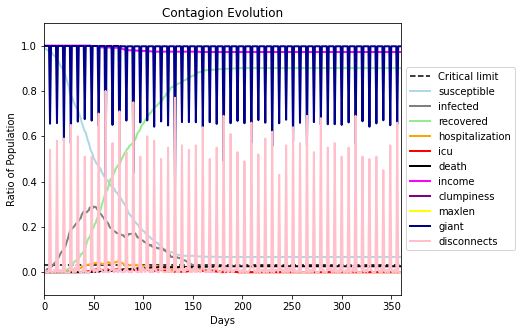

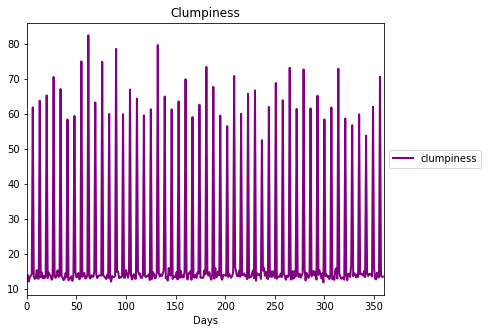

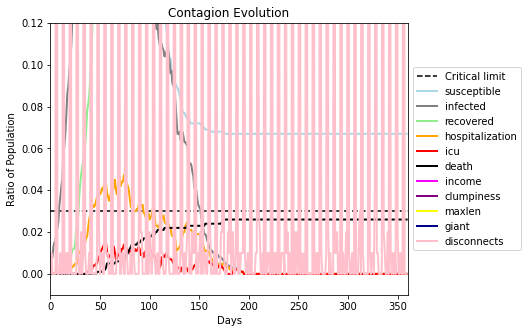

In [10]:
import logging
def setLevel(level):
    logger1 = logging.getLogger()
    logger1.setLevel(level)
params.params['temperature'] = -0.995
seeds = [9675]
setLevel(logging.CRITICAL)
multiple_runs(params,population_size,simulation_cycles,num_runs= num_runs,fname = run_prefix+"T-.995", 
              do_print = True, 
              home_grid_height = 8, home_grid_width = 10, school_home_list = 

[
[
(0,0),(0,1),(0,2),(0,3),(0,4),
(0,5),(0,6),(0,7),(0,8),(0,9),
(1,0),(1,1),(1,2),(1,3),(1,4),
(1,5),(1,6),(1,7),(1,8),(1,9)],
[
(2,0),(2,1),(2,2),(2,3),(2,4),
(2,5),(2,6),(2,7),(2,8),(2,9),
(3,0),(3,1),(3,2),(3,3),(3,4),
(3,5),(3,6),(3,7),(3,8),(3,9)],
[
(4,0),(4,1),(4,2),(4,3),(4,4),
(4,5),(4,6),(4,7),(4,8),(4,9),
(5,0),(5,1),(5,2),(5,3),(5,4),
(5,5),(5,6),(5,7),(5,8),(5,9)],
[
(6,0),(6,1),(6,2),(6,3),(6,4),
(6,5),(6,6),(6,7),(6,8),(6,9),
(7,0),(7,1),(7,2),(7,3),(7,4),
(7,5),(7,6),(7,7),(7,8),(7,9)]
]

,work_home_list =     
[
[
(0,0),(0,1),(0,2),(0,3),(0,4),
(0,5),(0,6),(0,7),(0,8),(0,9),
(1,0),(1,1),(1,2),(1,3),(1,4),
(1,5),(1,6),(1,7),(1,8),(1,9),

(2,0),(2,1),(2,2),(2,3),(2,4),
(2,5),(2,6),(2,7),(2,8),(2,9),
(3,0),(3,1),(3,2),(3,3),(3,4),
(3,5),(3,6),(3,7),(3,8),(3,9),


(4,0),(4,1),(4,2),(4,3),(4,4),
(4,5),(4,6),(4,7),(4,8),(4,9),
(5,0),(5,1),(5,2),(5,3),(5,4),
(5,5),(5,6),(5,7),(5,8),(5,9),

(6,0),(6,1),(6,2),(6,3),(6,4),
(6,5),(6,6),(6,7),(6,8),(6,9),
(7,0),(7,1),(7,2),(7,3),(7,4),
(7,5),(7,6),(7,7),(7,8),(7,9)
]

],listeners = listeners, compute_hoprank= compute_hoprank)


Save these seeds if you want to rerun a scenario
[8646]
Average similarity between family members is 0.9827157199760533 at temperature -0.994
Average similarity between family and home is 0.9998999879858449 at temperature -1
Average similarity between students and their classroom is 0.5588312203037782 at temperature -0.994
Average classroom occupancy is 11.375 and number classrooms is 24
Average similarity between workers is 0.927490307040479 at temperature -0.994
Average office occupancy is 10.415384615384616 and number offices is 65
Average friend similarity for adults: 0.973545804521933 for kids: 0.719932113589648
home_districts
[
Home (0,0) district with 1 Buildings
HomogeneousBuilding: 20 units (each with capacity for 5 people.) 0 allocated units with a total of 0 people.
Total of 0 people allocated in this district.
, 
Home (1,0) district with 1 Buildings
HomogeneousBuilding: 20 units (each with capacity for 5 people.) 1 allocated units with a total of 2 people.
Total of 2 people

avg restaurant similarity 0.5129345272567488
clumpiness 12.46
maxlen 20
giant component 0.9986329460013671
disconnects 0.01
avg restaurant similarity 0.5339606744367948
clumpiness 13.17
maxlen 19
giant component 0.9986329460013671
disconnects 0.01
avg restaurant similarity 0.4051472138099174
clumpiness 11.82
maxlen 18
giant component 0.9986329460013671
disconnects 0.01
avg restaurant similarity 0.5713035107855233
clumpiness 11.98
maxlen 20
giant component 0.9986329460013671
disconnects 0.0
avg restaurant similarity 0.4467692736007787
clumpiness 11.05
maxlen 20
giant component 0.9986329460013671
disconnects 0.0
avg restaurant similarity 0.4971342985644766
clumpiness 12.12
maxlen 21
giant component 0.9986329460013671
disconnects 0.0
avg restaurant similarity 0.514680581752047
clumpiness 51.44
maxlen 22
giant component 0.7303290414878397
disconnects 0.44
avg restaurant similarity 0.5754110886657673
clumpiness 11.26
maxlen 19
giant component 0.9986329460013671
disconnects 0.0
avg restauran

avg restaurant similarity 0.420517452665165
clumpiness 14.85
maxlen 22
giant component 0.9986329460013671
disconnects 0.03
avg restaurant similarity 0.3829154349506899
clumpiness 11.34
maxlen 20
giant component 0.9986329460013671
disconnects 0.0
avg restaurant similarity 0.4361943769686423
clumpiness 58.33
maxlen 22
giant component 0.7188841201716738
disconnects 0.52
avg restaurant similarity 0.45132774121467534
clumpiness 11.29
maxlen 19
giant component 0.9986329460013671
disconnects 0.0
avg restaurant similarity 0.5028195165705756
clumpiness 12.0
maxlen 21
giant component 0.9986329460013671
disconnects 0.0
avg restaurant similarity 0.4099373713914924
clumpiness 11.77
maxlen 20
giant component 0.9986329460013671
disconnects 0.0
avg restaurant similarity 0.517109482801107
clumpiness 11.95
maxlen 21
giant component 0.9986329460013671
disconnects 0.0
avg restaurant similarity 0.4332266454904838
clumpiness 11.51
maxlen 18
giant component 0.9986329460013671
disconnects 0.0
avg restaurant s

clumpiness 11.61
maxlen 20
giant component 0.9972640218878249
disconnects 0.0
avg restaurant similarity 0.3883646498900603
clumpiness 13.47
maxlen 26
giant component 0.9972658920027341
disconnects 0.0
avg restaurant similarity 0.3881996782446519
clumpiness 13.45
maxlen 20
giant component 0.9972640218878249
disconnects 0.01
avg restaurant similarity 0.25758306519588375
clumpiness 14.63
maxlen 22
giant component 0.9972640218878249
disconnects 0.02
avg restaurant similarity 0.47862026184521417
clumpiness 12.81
maxlen 21
giant component 0.9972658920027341
disconnects 0.01
avg restaurant similarity 0.3153622442342954
clumpiness 13.11
maxlen 21
giant component 0.9972658920027341
disconnects 0.01
avg restaurant similarity 0.4394307897377342
clumpiness 61.09
maxlen 37
giant component 0.678826895565093
disconnects 0.53
avg restaurant similarity 0.23518361747120559
clumpiness 12.89
maxlen 21
giant component 0.9972640218878249
disconnects 0.0
avg restaurant similarity 0.38348043847045626
clumpine

avg restaurant similarity 0.46636354201190094
clumpiness 12.34
maxlen 19
giant component 0.9972658920027341
disconnects 0.0
avg restaurant similarity 0.45799478209518435
clumpiness 11.85
maxlen 20
giant component 0.9972658920027341
disconnects 0.0
avg restaurant similarity 0.5539815572745427
clumpiness 69.52
maxlen 27
giant component 0.7110157367668097
disconnects 0.64
avg restaurant similarity 0.48157353778273915
clumpiness 13.07
maxlen 26
giant component 0.9972658920027341
disconnects 0.0
avg restaurant similarity 0.41350196025758856
clumpiness 11.69
maxlen 18
giant component 0.9972658920027341
disconnects 0.0
avg restaurant similarity 0.4305357538240693
clumpiness 12.59
maxlen 21
giant component 0.9972658920027341
disconnects 0.01
avg restaurant similarity 0.5356854353732433
clumpiness 13.89
maxlen 20
giant component 0.9972658920027341
disconnects 0.02
avg restaurant similarity 0.5321023011387724
clumpiness 12.24
maxlen 20
giant component 0.9972658920027341
disconnects 0.01
avg rest

clumpiness 12.37
maxlen 19
giant component 0.9972658920027341
disconnects 0.01
avg restaurant similarity 0.4941788165958358
clumpiness 12.74
maxlen 23
giant component 0.9972658920027341
disconnects 0.01
avg restaurant similarity 0.6090756389065285
clumpiness 13.5
maxlen 19
giant component 0.9972658920027341
disconnects 0.02
avg restaurant similarity 0.4503263730062839
clumpiness 12.76
maxlen 20
giant component 0.9972658920027341
disconnects 0.01
avg restaurant similarity 0.4612228571339889
clumpiness 11.82
maxlen 19
giant component 0.9972658920027341
disconnects 0.0
avg restaurant similarity 0.4878519684796412
clumpiness 12.19
maxlen 19
giant component 0.9972658920027341
disconnects 0.01
avg restaurant similarity 0.5994736439280026
clumpiness 57.85
maxlen 30
giant component 0.7110157367668097
disconnects 0.49
avg restaurant similarity 0.4522041443620941
clumpiness 13.15
maxlen 20
giant component 0.9972658920027341
disconnects 0.01
avg restaurant similarity 0.4976072314128568
clumpiness

avg restaurant similarity 0.4617166107239435
clumpiness 11.12
maxlen 18
giant component 0.9972658920027341
disconnects 0.0
avg restaurant similarity 0.4913217135880106
clumpiness 12.37
maxlen 23
giant component 0.9972658920027341
disconnects 0.0
avg restaurant similarity 0.4087610236842062
clumpiness 52.59
maxlen 27
giant component 0.721030042918455
disconnects 0.44
avg restaurant similarity 0.4279137498410473
clumpiness 11.98
maxlen 21
giant component 0.9972658920027341
disconnects 0.0
avg restaurant similarity 0.375220468158031
clumpiness 13.13
maxlen 25
giant component 0.9972658920027341
disconnects 0.01
avg restaurant similarity 0.5255098255088766
clumpiness 12.43
maxlen 25
giant component 0.9972658920027341
disconnects 0.01
avg restaurant similarity 0.45343118651486575
clumpiness 12.03
maxlen 21
giant component 0.9972658920027341
disconnects 0.0
avg restaurant similarity 0.44863844311438444
clumpiness 11.08
maxlen 17
giant component 0.9972658920027341
disconnects 0.0
avg restauran

(<function dict.items>, <function dict.items>, <function dict.items>)

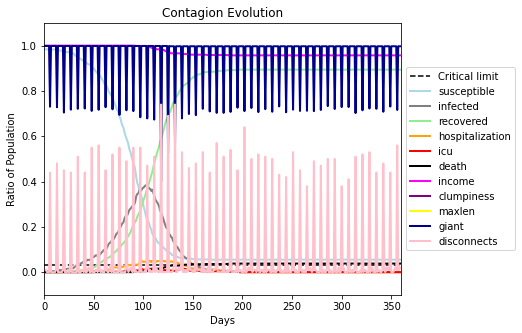

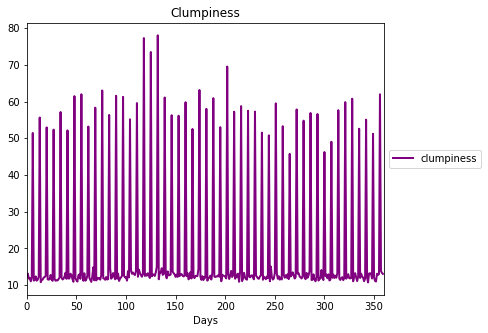

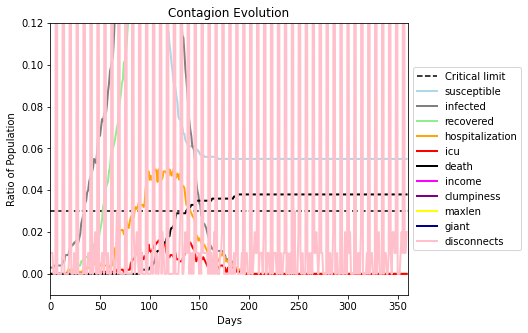

In [11]:
import logging
def setLevel(level):
    logger1 = logging.getLogger()
    logger1.setLevel(level)
params.params['temperature'] = -0.994
seeds = [9675]
setLevel(logging.CRITICAL)
multiple_runs(params,population_size,simulation_cycles,num_runs= num_runs,fname = run_prefix+"T-.994", 
              do_print = True, 
              home_grid_height = 8, home_grid_width = 10, school_home_list = 

[
[
(0,0),(0,1),(0,2),(0,3),(0,4),
(0,5),(0,6),(0,7),(0,8),(0,9),
(1,0),(1,1),(1,2),(1,3),(1,4),
(1,5),(1,6),(1,7),(1,8),(1,9)],
[
(2,0),(2,1),(2,2),(2,3),(2,4),
(2,5),(2,6),(2,7),(2,8),(2,9),
(3,0),(3,1),(3,2),(3,3),(3,4),
(3,5),(3,6),(3,7),(3,8),(3,9)],
[
(4,0),(4,1),(4,2),(4,3),(4,4),
(4,5),(4,6),(4,7),(4,8),(4,9),
(5,0),(5,1),(5,2),(5,3),(5,4),
(5,5),(5,6),(5,7),(5,8),(5,9)],
[
(6,0),(6,1),(6,2),(6,3),(6,4),
(6,5),(6,6),(6,7),(6,8),(6,9),
(7,0),(7,1),(7,2),(7,3),(7,4),
(7,5),(7,6),(7,7),(7,8),(7,9)]
]

,work_home_list =     
[
[
(0,0),(0,1),(0,2),(0,3),(0,4),
(0,5),(0,6),(0,7),(0,8),(0,9),
(1,0),(1,1),(1,2),(1,3),(1,4),
(1,5),(1,6),(1,7),(1,8),(1,9),

(2,0),(2,1),(2,2),(2,3),(2,4),
(2,5),(2,6),(2,7),(2,8),(2,9),
(3,0),(3,1),(3,2),(3,3),(3,4),
(3,5),(3,6),(3,7),(3,8),(3,9),


(4,0),(4,1),(4,2),(4,3),(4,4),
(4,5),(4,6),(4,7),(4,8),(4,9),
(5,0),(5,1),(5,2),(5,3),(5,4),
(5,5),(5,6),(5,7),(5,8),(5,9),

(6,0),(6,1),(6,2),(6,3),(6,4),
(6,5),(6,6),(6,7),(6,8),(6,9),
(7,0),(7,1),(7,2),(7,3),(7,4),
(7,5),(7,6),(7,7),(7,8),(7,9)
]

],listeners = listeners, compute_hoprank = compute_hoprank)


Save these seeds if you want to rerun a scenario
[350]
Average similarity between family members is 0.9783609127368563 at temperature -0.993
Average similarity between family and home is 0.9999015881860007 at temperature -1
Average similarity between students and their classroom is 0.5004097217266655 at temperature -0.993
Average classroom occupancy is 11.291666666666666 and number classrooms is 24
Average similarity between workers is 0.9252695862799544 at temperature -0.993
Average office occupancy is 10.65079365079365 and number offices is 63
Average friend similarity for adults: 0.9664125389160726 for kids: 0.6846867689194708
home_districts
[
Home (0,0) district with 1 Buildings
HomogeneousBuilding: 20 units (each with capacity for 5 people.) 1 allocated units with a total of 3 people.
Total of 3 people allocated in this district.
, 
Home (1,0) district with 1 Buildings
HomogeneousBuilding: 20 units (each with capacity for 5 people.) 1 allocated units with a total of 2 people.
Tota

run with seed 350:
avg restaurant similarity 0.4430203118608319
clumpiness 10.89
maxlen 20
giant component 0.994486560992419
disconnects 0.0
avg restaurant similarity 0.42940089717413904
clumpiness 13.45
maxlen 20
giant component 0.994486560992419
disconnects 0.02
avg restaurant similarity 0.42773398514603034
clumpiness 12.54
maxlen 18
giant component 0.994486560992419
disconnects 0.01
avg restaurant similarity 0.37916678005962884
clumpiness 11.42
maxlen 18
giant component 0.994486560992419
disconnects 0.01
avg restaurant similarity 0.349833859140009
clumpiness 12.53
maxlen 20
giant component 0.994486560992419
disconnects 0.01
avg restaurant similarity 0.36616472467147715
clumpiness 13.79
maxlen 18
giant component 0.994486560992419
disconnects 0.03
avg restaurant similarity 0.25151681044797175
clumpiness 67.96
maxlen 25
giant component 0.6520172910662824
disconnects 0.63
avg restaurant similarity 0.4429710646562132
clumpiness 12.74
maxlen 21
giant component 0.994486560992419
disconnect

avg restaurant similarity 0.30479271946901293
clumpiness 12.81
maxlen 19
giant component 0.994486560992419
disconnects 0.02
avg restaurant similarity 0.5541050985584085
clumpiness 12.37
maxlen 18
giant component 0.994486560992419
disconnects 0.01
avg restaurant similarity 0.4263911719046439
clumpiness 67.32
maxlen 37
giant component 0.6498559077809798
disconnects 0.6
avg restaurant similarity 0.3503327584956787
clumpiness 13.41
maxlen 21
giant component 0.994486560992419
disconnects 0.02
avg restaurant similarity 0.4479518132718164
clumpiness 12.35
maxlen 18
giant component 0.994486560992419
disconnects 0.01
avg restaurant similarity 0.4249894916701782
clumpiness 11.92
maxlen 20
giant component 0.994486560992419
disconnects 0.01
avg restaurant similarity 0.47320085706142434
clumpiness 12.42
maxlen 21
giant component 0.994486560992419
disconnects 0.01
avg restaurant similarity 0.5012610666256571
clumpiness 13.12
maxlen 20
giant component 0.994486560992419
disconnects 0.02
avg restaurant

avg restaurant similarity 0.43914134493983703
clumpiness 13.54
maxlen 21
giant component 0.994486560992419
disconnects 0.02
avg restaurant similarity 0.45818094268406023
clumpiness 12.41
maxlen 20
giant component 0.994486560992419
disconnects 0.01
avg restaurant similarity 0.36837212124295976
clumpiness 12.02
maxlen 20
giant component 0.994486560992419
disconnects 0.0
avg restaurant similarity 0.3356952768023239
clumpiness 11.8
maxlen 18
giant component 0.994486560992419
disconnects 0.01
avg restaurant similarity 0.35526006103068203
clumpiness 12.28
maxlen 22
giant component 0.994486560992419
disconnects 0.0
avg restaurant similarity 0.48674061195290563
clumpiness 63.89
maxlen 27
giant component 0.6657060518731989
disconnects 0.58
avg restaurant similarity 0.3428164183483086
clumpiness 11.13
maxlen 18
giant component 0.9986216402481047
disconnects 0.0
avg restaurant similarity 0.3281992289975307
clumpiness 11.86
maxlen 21
giant component 0.994486560992419
disconnects 0.01
avg restauran

clumpiness 11.93
maxlen 20
giant component 0.9903514817367333
disconnects 0.0
avg restaurant similarity 0.37015834003860826
clumpiness 14.06
maxlen 22
giant component 0.9903514817367333
disconnects 0.03
avg restaurant similarity 0.4273814942942206
clumpiness 76.35
maxlen 35
giant component 0.5252161383285303
disconnects 0.71
avg restaurant similarity 0.5652534600927321
clumpiness 13.58
maxlen 21
giant component 0.9903448275862069
disconnects 0.02
avg restaurant similarity 0.5190385559468205
clumpiness 12.06
maxlen 20
giant component 0.9903448275862069
disconnects 0.01
avg restaurant similarity 0.493382397456621
clumpiness 14.28
maxlen 20
giant component 0.9903514817367333
disconnects 0.03
avg restaurant similarity 0.391324574040147
clumpiness 12.43
maxlen 19
giant component 0.9903514817367333
disconnects 0.01
avg restaurant similarity 0.3726371163495725
clumpiness 13.18
maxlen 20
giant component 0.9903514817367333
disconnects 0.02
avg restaurant similarity 0.4053466718041265
clumpiness

avg restaurant similarity 0.2663145896593408
clumpiness 11.71
maxlen 20
giant component 0.9903514817367333
disconnects 0.01
avg restaurant similarity 0.37251006497525446
clumpiness 12.24
maxlen 20
giant component 0.9903514817367333
disconnects 0.0
avg restaurant similarity 0.46089010335990416
clumpiness 13.98
maxlen 17
giant component 0.9903514817367333
disconnects 0.03
avg restaurant similarity 0.36973035260763215
clumpiness 14.32
maxlen 18
giant component 0.9903514817367333
disconnects 0.03
avg restaurant similarity 0.44608467906609583
clumpiness 12.79
maxlen 23
giant component 0.9903514817367333
disconnects 0.01
avg restaurant similarity 0.37931090804424555
clumpiness 60.48
maxlen 33
giant component 0.680835734870317
disconnects 0.52
avg restaurant similarity 0.4022461638310986
clumpiness 11.27
maxlen 22
giant component 0.9903514817367333
disconnects 0.0
avg restaurant similarity 0.3357456258456657
clumpiness 12.49
maxlen 19
giant component 0.9903514817367333
disconnects 0.02
avg re

clumpiness 14.27
maxlen 21
giant component 0.9903514817367333
disconnects 0.02
avg restaurant similarity 0.36882663334765314
clumpiness 14.53
maxlen 20
giant component 0.9903514817367333
disconnects 0.03
avg restaurant similarity 0.44944117736792355
clumpiness 75.35
maxlen 22
giant component 0.4920749279538905
disconnects 0.72
avg restaurant similarity 0.415213153245041
clumpiness 12.18
maxlen 20
giant component 0.9903514817367333
disconnects 0.01
avg restaurant similarity 0.4459823573799132
clumpiness 11.87
maxlen 17
giant component 0.9903514817367333
disconnects 0.01
avg restaurant similarity 0.3834496920380654
clumpiness 12.53
maxlen 21
giant component 0.9903514817367333
disconnects 0.01
avg restaurant similarity 0.42092014219438334
clumpiness 11.6
maxlen 20
giant component 0.9903514817367333
disconnects 0.0
avg restaurant similarity 0.4682691664153725
clumpiness 12.35
maxlen 20
giant component 0.9903514817367333
disconnects 0.01
avg restaurant similarity 0.513482006523549
clumpines

(<function dict.items>, <function dict.items>, <function dict.items>)

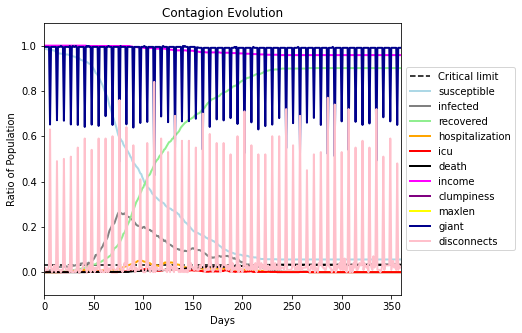

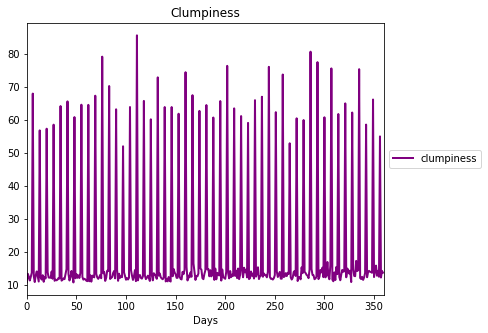

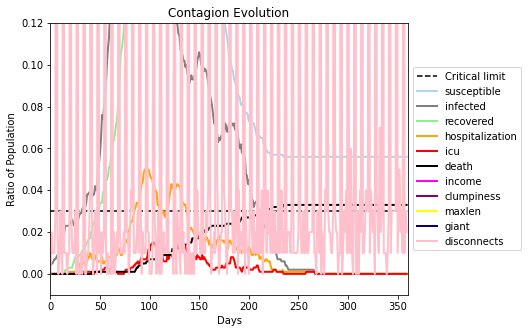

In [12]:
import logging
def setLevel(level):
    logger1 = logging.getLogger()
    logger1.setLevel(level)
params.params['temperature'] = -0.993
seeds = [9675]
setLevel(logging.CRITICAL)
multiple_runs(params,population_size,simulation_cycles,num_runs= num_runs,fname = run_prefix+"T-.993", 
              do_print = True, 
              home_grid_height = 8, home_grid_width = 10, school_home_list = 

[
[
(0,0),(0,1),(0,2),(0,3),(0,4),
(0,5),(0,6),(0,7),(0,8),(0,9),
(1,0),(1,1),(1,2),(1,3),(1,4),
(1,5),(1,6),(1,7),(1,8),(1,9)],
[
(2,0),(2,1),(2,2),(2,3),(2,4),
(2,5),(2,6),(2,7),(2,8),(2,9),
(3,0),(3,1),(3,2),(3,3),(3,4),
(3,5),(3,6),(3,7),(3,8),(3,9)],
[
(4,0),(4,1),(4,2),(4,3),(4,4),
(4,5),(4,6),(4,7),(4,8),(4,9),
(5,0),(5,1),(5,2),(5,3),(5,4),
(5,5),(5,6),(5,7),(5,8),(5,9)],
[
(6,0),(6,1),(6,2),(6,3),(6,4),
(6,5),(6,6),(6,7),(6,8),(6,9),
(7,0),(7,1),(7,2),(7,3),(7,4),
(7,5),(7,6),(7,7),(7,8),(7,9)]
]

,work_home_list =     
[
[
(0,0),(0,1),(0,2),(0,3),(0,4),
(0,5),(0,6),(0,7),(0,8),(0,9),
(1,0),(1,1),(1,2),(1,3),(1,4),
(1,5),(1,6),(1,7),(1,8),(1,9),

(2,0),(2,1),(2,2),(2,3),(2,4),
(2,5),(2,6),(2,7),(2,8),(2,9),
(3,0),(3,1),(3,2),(3,3),(3,4),
(3,5),(3,6),(3,7),(3,8),(3,9),


(4,0),(4,1),(4,2),(4,3),(4,4),
(4,5),(4,6),(4,7),(4,8),(4,9),
(5,0),(5,1),(5,2),(5,3),(5,4),
(5,5),(5,6),(5,7),(5,8),(5,9),

(6,0),(6,1),(6,2),(6,3),(6,4),
(6,5),(6,6),(6,7),(6,8),(6,9),
(7,0),(7,1),(7,2),(7,3),(7,4),
(7,5),(7,6),(7,7),(7,8),(7,9)
]

],listeners = listeners, compute_hoprank = compute_hoprank)


Save these seeds if you want to rerun a scenario
[588]
Average similarity between family members is 0.9823728327950124 at temperature -0.992
Average similarity between family and home is 0.9998787086272756 at temperature -1
Average similarity between students and their classroom is 0.5113215742160341 at temperature -0.992
Average classroom occupancy is 11.75 and number classrooms is 24
Average similarity between workers is 0.9244250592696673 at temperature -0.992
Average office occupancy is 10.138461538461538 and number offices is 65
Average friend similarity for adults: 0.9611099195010736 for kids: 0.66914110810567
home_districts
[
Home (0,0) district with 1 Buildings
HomogeneousBuilding: 20 units (each with capacity for 5 people.) 0 allocated units with a total of 0 people.
Total of 0 people allocated in this district.
, 
Home (1,0) district with 1 Buildings
HomogeneousBuilding: 20 units (each with capacity for 5 people.) 1 allocated units with a total of 3 people.
Total of 3 people 

run with seed 588:
avg restaurant similarity 0.5389310844007877
clumpiness 11.98
maxlen 21
giant component 1.0
disconnects 0.0
avg restaurant similarity 0.28804693002254733
clumpiness 12.01
maxlen 20
giant component 1.0
disconnects 0.0
avg restaurant similarity 0.27904166899102767
clumpiness 10.96
maxlen 18
giant component 1.0
disconnects 0.0
avg restaurant similarity 0.2951408571572154
clumpiness 12.19
maxlen 20
giant component 1.0
disconnects 0.0
avg restaurant similarity 0.21872138158381224
clumpiness 12.32
maxlen 19
giant component 1.0
disconnects 0.0
avg restaurant similarity 0.32597584793717005
clumpiness 11.28
maxlen 19
giant component 1.0
disconnects 0.0
avg restaurant similarity 0.3296314646414125
clumpiness 65.01
maxlen 37
giant component 0.6440922190201729
disconnects 0.58
avg restaurant similarity 0.3180532163700498
clumpiness 12.09
maxlen 19
giant component 1.0
disconnects 0.0
avg restaurant similarity 0.4676610469997705
clumpiness 11.55
maxlen 23
giant component 1.0
disco

avg restaurant similarity 0.2683537446184427
clumpiness 12.22
maxlen 22
giant component 1.0
disconnects 0.0
avg restaurant similarity 0.2471059341773501
clumpiness 11.83
maxlen 24
giant component 1.0
disconnects 0.0
avg restaurant similarity 0.41083284826827093
clumpiness 72.7
maxlen 46
giant component 0.6301369863013698
disconnects 0.65
avg restaurant similarity 0.29048320240446174
clumpiness 12.37
maxlen 20
giant component 1.0
disconnects 0.0
avg restaurant similarity 0.1200698730261098
clumpiness 13.14
maxlen 22
giant component 1.0
disconnects 0.0
avg restaurant similarity 0.16433803056593518
clumpiness 11.78
maxlen 19
giant component 1.0
disconnects 0.0
avg restaurant similarity 0.29714705100760125
clumpiness 11.44
maxlen 21
giant component 1.0
disconnects 0.0
avg restaurant similarity 0.13049699752870023
clumpiness 11.78
maxlen 21
giant component 1.0
disconnects 0.0
avg restaurant similarity 0.2220477722882165
clumpiness 12.34
maxlen 22
giant component 1.0
disconnects 0.0
avg rest

avg restaurant similarity 0.23978003129689052
clumpiness 13.01
maxlen 20
giant component 1.0
disconnects 0.0
avg restaurant similarity 0.22441500239366663
clumpiness 11.75
maxlen 20
giant component 1.0
disconnects 0.0
avg restaurant similarity 0.34440976116716837
clumpiness 12.13
maxlen 20
giant component 1.0
disconnects 0.0
avg restaurant similarity 0.3020838288976399
clumpiness 12.38
maxlen 21
giant component 1.0
disconnects 0.0
avg restaurant similarity 0.3370838011281625
clumpiness 12.12
maxlen 21
giant component 1.0
disconnects 0.0
avg restaurant similarity 0.283999941358378
clumpiness 75.25
maxlen 29
giant component 0.5965417867435159
disconnects 0.71
avg restaurant similarity 0.4426894883278127
clumpiness 12.51
maxlen 22
giant component 1.0
disconnects 0.0
avg restaurant similarity 0.3669189018644469
clumpiness 11.72
maxlen 18
giant component 1.0
disconnects 0.0
avg restaurant similarity 0.390736168075243
clumpiness 11.84
maxlen 20
giant component 1.0
disconnects 0.0
avg restaur

clumpiness 12.18
maxlen 19
giant component 1.0
disconnects 0.0
avg restaurant similarity 0.19324879235178458
clumpiness 85.62
maxlen 18
giant component 0.2615273775216138
disconnects 0.84
avg restaurant similarity 0.09043690712524358
clumpiness 12.44
maxlen 19
giant component 1.0
disconnects 0.0
avg restaurant similarity 0.4292328309936688
clumpiness 12.14
maxlen 22
giant component 1.0
disconnects 0.0
avg restaurant similarity 0.31640109644397413
clumpiness 11.62
maxlen 19
giant component 1.0
disconnects 0.0
avg restaurant similarity 0.44141856570998816
clumpiness 11.71
maxlen 18
giant component 1.0
disconnects 0.0
avg restaurant similarity 0.2609806014348526
clumpiness 12.42
maxlen 20
giant component 1.0
disconnects 0.0
avg restaurant similarity 0.3643071425229318
clumpiness 11.73
maxlen 20
giant component 1.0
disconnects 0.0
avg restaurant similarity 0.17813331612327635
clumpiness 60.28
maxlen 23
giant component 0.6488824801730353
disconnects 0.54
avg restaurant similarity 0.21789420

clumpiness 11.81
maxlen 20
giant component 1.0
disconnects 0.0
avg restaurant similarity 0.32189408592173435
clumpiness 12.26
maxlen 20
giant component 1.0
disconnects 0.0
avg restaurant similarity 0.349072581597359
clumpiness 11.86
maxlen 20
giant component 1.0
disconnects 0.0
avg restaurant similarity 0.2007104367813595
clumpiness 12.47
maxlen 21
giant component 1.0
disconnects 0.0
avg restaurant similarity 0.15060959230633555
clumpiness 55.41
maxlen 27
giant component 0.7118155619596542
disconnects 0.48
avg restaurant similarity 0.46883701637740854
clumpiness 12.24
maxlen 21
giant component 1.0
disconnects 0.0
avg restaurant similarity 0.29500554166969045
clumpiness 11.72
maxlen 20
giant component 1.0
disconnects 0.0
avg restaurant similarity 0.3806324373273232
clumpiness 12.36
maxlen 22
giant component 1.0
disconnects 0.0
avg restaurant similarity 0.19440789477800716
clumpiness 12.51
maxlen 20
giant component 1.0
disconnects 0.0
avg restaurant similarity 0.2435373915352815
clumpine

(<function dict.items>, <function dict.items>, <function dict.items>)

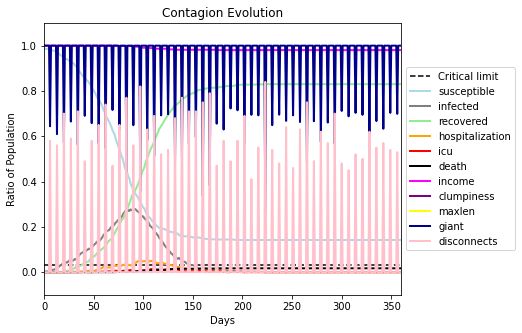

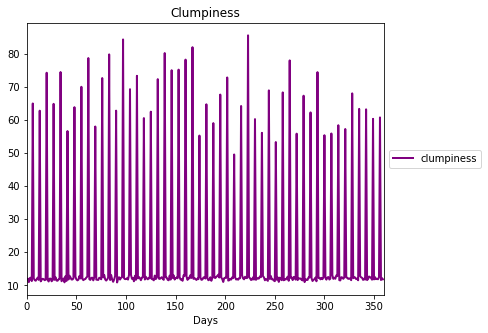

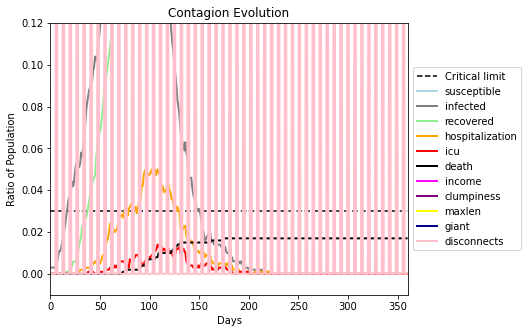

In [13]:
import logging
def setLevel(level):
    logger1 = logging.getLogger()
    logger1.setLevel(level)
params.params['temperature'] = -0.992
seeds = [9675]
setLevel(logging.CRITICAL)
multiple_runs(params,population_size,simulation_cycles,num_runs= num_runs,fname = run_prefix+"T-.992", 
              do_print = True, 
              home_grid_height = 8, home_grid_width = 10, school_home_list = 

[
[
(0,0),(0,1),(0,2),(0,3),(0,4),
(0,5),(0,6),(0,7),(0,8),(0,9),
(1,0),(1,1),(1,2),(1,3),(1,4),
(1,5),(1,6),(1,7),(1,8),(1,9)],
[
(2,0),(2,1),(2,2),(2,3),(2,4),
(2,5),(2,6),(2,7),(2,8),(2,9),
(3,0),(3,1),(3,2),(3,3),(3,4),
(3,5),(3,6),(3,7),(3,8),(3,9)],
[
(4,0),(4,1),(4,2),(4,3),(4,4),
(4,5),(4,6),(4,7),(4,8),(4,9),
(5,0),(5,1),(5,2),(5,3),(5,4),
(5,5),(5,6),(5,7),(5,8),(5,9)],
[
(6,0),(6,1),(6,2),(6,3),(6,4),
(6,5),(6,6),(6,7),(6,8),(6,9),
(7,0),(7,1),(7,2),(7,3),(7,4),
(7,5),(7,6),(7,7),(7,8),(7,9)]
]

,work_home_list =     
[
[
(0,0),(0,1),(0,2),(0,3),(0,4),
(0,5),(0,6),(0,7),(0,8),(0,9),
(1,0),(1,1),(1,2),(1,3),(1,4),
(1,5),(1,6),(1,7),(1,8),(1,9),

(2,0),(2,1),(2,2),(2,3),(2,4),
(2,5),(2,6),(2,7),(2,8),(2,9),
(3,0),(3,1),(3,2),(3,3),(3,4),
(3,5),(3,6),(3,7),(3,8),(3,9),


(4,0),(4,1),(4,2),(4,3),(4,4),
(4,5),(4,6),(4,7),(4,8),(4,9),
(5,0),(5,1),(5,2),(5,3),(5,4),
(5,5),(5,6),(5,7),(5,8),(5,9),

(6,0),(6,1),(6,2),(6,3),(6,4),
(6,5),(6,6),(6,7),(6,8),(6,9),
(7,0),(7,1),(7,2),(7,3),(7,4),
(7,5),(7,6),(7,7),(7,8),(7,9)
]

],listeners = listeners, compute_hoprank= compute_hoprank )


Save these seeds if you want to rerun a scenario
[195]
Average similarity between family members is 0.979230080617734 at temperature -0.991
Average similarity between family and home is 0.9999051891755025 at temperature -1
Average similarity between students and their classroom is 0.5032646069317727 at temperature -0.991
Average classroom occupancy is 11.5 and number classrooms is 24
Average similarity between workers is 0.860077434139398 at temperature -0.991
Average office occupancy is 10.107692307692307 and number offices is 65
Average friend similarity for adults: 0.934251763754518 for kids: 0.6614345609639235
home_districts
[
Home (0,0) district with 1 Buildings
HomogeneousBuilding: 20 units (each with capacity for 5 people.) 0 allocated units with a total of 0 people.
Total of 0 people allocated in this district.
, 
Home (1,0) district with 1 Buildings
HomogeneousBuilding: 20 units (each with capacity for 5 people.) 0 allocated units with a total of 0 people.
Total of 0 people al

run with seed 195:
avg restaurant similarity 0.5452256388525026
clumpiness 11.01
maxlen 19
giant component 0.9965373961218836
disconnects 0.0
avg restaurant similarity 0.42333505562922596
clumpiness 11.49
maxlen 18
giant component 0.9965373961218836
disconnects 0.01
avg restaurant similarity 0.4816638224839239
clumpiness 11.18
maxlen 16
giant component 0.9965373961218836
disconnects 0.01
avg restaurant similarity 0.3773954813256594
clumpiness 12.46
maxlen 19
giant component 0.9965373961218836
disconnects 0.02
avg restaurant similarity 0.39191565757895785
clumpiness 10.56
maxlen 17
giant component 0.9965373961218836
disconnects 0.0
avg restaurant similarity 0.42084513059463935
clumpiness 11.16
maxlen 17
giant component 0.9965373961218836
disconnects 0.01
avg restaurant similarity 0.5984859879368022
clumpiness 61.73
maxlen 29
giant component 0.6802030456852792
disconnects 0.56
avg restaurant similarity 0.40674729152493916
clumpiness 10.76
maxlen 18
giant component 0.9965373961218836
disc

clumpiness 10.97
maxlen 18
giant component 0.9951523545706371
disconnects 0.0
avg restaurant similarity 0.31477084801261435
clumpiness 11.69
maxlen 20
giant component 0.9951523545706371
disconnects 0.01
avg restaurant similarity 0.4256946597234077
clumpiness 10.67
maxlen 17
giant component 0.9951523545706371
disconnects 0.01
avg restaurant similarity 0.3971634848214611
clumpiness 70.78
maxlen 21
giant component 0.5453226976069616
disconnects 0.67
avg restaurant similarity 0.3620437254499251
clumpiness 10.29
maxlen 19
giant component 0.9951523545706371
disconnects 0.0
avg restaurant similarity 0.45402641851063674
clumpiness 11.65
maxlen 19
giant component 0.9951523545706371
disconnects 0.02
avg restaurant similarity 0.24585805941022018
clumpiness 11.05
maxlen 18
giant component 0.9951523545706371
disconnects 0.0
avg restaurant similarity 0.3193347426759744
clumpiness 12.24
maxlen 21
giant component 0.9951523545706371
disconnects 0.01
avg restaurant similarity 0.41090531144924486
clumpin

clumpiness 61.3
maxlen 34
giant component 0.6635242929659173
disconnects 0.55
avg restaurant similarity 0.32648237737492913
clumpiness 11.3
maxlen 24
giant component 0.9937673130193906
disconnects 0.0
avg restaurant similarity 0.34193531366213914
clumpiness 13.88
maxlen 22
giant component 0.9937673130193906
disconnects 0.03
avg restaurant similarity 0.23243787651038653
clumpiness 10.44
maxlen 20
giant component 0.9937673130193906
disconnects 0.0
avg restaurant similarity 0.35715606717524595
clumpiness 10.31
maxlen 20
giant component 0.9937673130193906
disconnects 0.0
avg restaurant similarity 0.38526739071435
clumpiness 13.27
maxlen 19
giant component 0.9923822714681441
disconnects 0.02
avg restaurant similarity 0.3196989369381703
clumpiness 13.16
maxlen 19
giant component 0.9923822714681441
disconnects 0.02
avg restaurant similarity 0.2587496118733312
clumpiness 66.54
maxlen 22
giant component 0.5496736765772299
disconnects 0.62
avg restaurant similarity 0.4252103721764935
clumpiness 

avg restaurant similarity 0.418500924759927
clumpiness 12.57
maxlen 20
giant component 0.9909972299168975
disconnects 0.02
avg restaurant similarity 0.4209116533704525
clumpiness 13.34
maxlen 20
giant component 0.9909972299168975
disconnects 0.02
avg restaurant similarity 0.44512013531449235
clumpiness 12.63
maxlen 20
giant component 0.9909972299168975
disconnects 0.02
avg restaurant similarity 0.5649597333825573
clumpiness 61.05
maxlen 27
giant component 0.6773023930384336
disconnects 0.55
avg restaurant similarity 0.5815123426980899
clumpiness 12.4
maxlen 21
giant component 0.9909972299168975
disconnects 0.02
avg restaurant similarity 0.5687680195716937
clumpiness 11.14
maxlen 19
giant component 0.9909972299168975
disconnects 0.0
avg restaurant similarity 0.4310961062871832
clumpiness 12.2
maxlen 22
giant component 0.9909972299168975
disconnects 0.02
avg restaurant similarity 0.4048179536644092
clumpiness 14.54
maxlen 19
giant component 0.9909972299168975
disconnects 0.04
avg restaur

clumpiness 56.36
maxlen 27
giant component 0.6635242929659173
disconnects 0.49
avg restaurant similarity 0.4193239354275887
clumpiness 12.52
maxlen 21
giant component 0.9909972299168975
disconnects 0.02
avg restaurant similarity 0.4814814019876172
clumpiness 12.28
maxlen 20
giant component 0.9909972299168975
disconnects 0.01
avg restaurant similarity 0.30820168878917176
clumpiness 12.4
maxlen 18
giant component 0.9909972299168975
disconnects 0.02
avg restaurant similarity 0.37491622771549193
clumpiness 13.27
maxlen 19
giant component 0.9909972299168975
disconnects 0.02
avg restaurant similarity 0.5152370954172819
clumpiness 11.51
maxlen 18
giant component 0.9909972299168975
disconnects 0.01
avg restaurant similarity 0.4195783434082331
clumpiness 14.11
maxlen 19
giant component 0.9909972299168975
disconnects 0.03
avg restaurant similarity 0.4962996464759404
clumpiness 66.08
maxlen 27
giant component 0.6845540246555475
disconnects 0.61
avg restaurant similarity 0.34539586591191623
clumpi

avg restaurant similarity 0.5309905331619696
clumpiness 14.04
maxlen 18
giant component 0.9909972299168975
disconnects 0.04
avg restaurant similarity 0.35835620959835246
clumpiness 12.35
maxlen 17
giant component 0.9909972299168975
disconnects 0.02
avg restaurant similarity 0.49457892132658415
clumpiness 12.62
maxlen 21
giant component 0.9909972299168975
disconnects 0.02
avg restaurant similarity 0.49149969767782614
clumpiness 58.59
maxlen 27
giant component 0.6939811457577955
disconnects 0.52
avg restaurant similarity 0.6511432928993953
clumpiness 11.6
maxlen 19
giant component 0.9909972299168975
disconnects 0.01
avg restaurant similarity 0.3303424212176437
clumpiness 15.63
maxlen 18
giant component 0.9909972299168975
disconnects 0.05
avg restaurant similarity 0.2652100000216452
clumpiness 11.54
maxlen 17
giant component 0.9909972299168975
disconnects 0.01
avg restaurant similarity 0.4252775301778607
clumpiness 12.18
maxlen 19
giant component 0.9909972299168975
disconnects 0.02
avg re

(<function dict.items>, <function dict.items>, <function dict.items>)

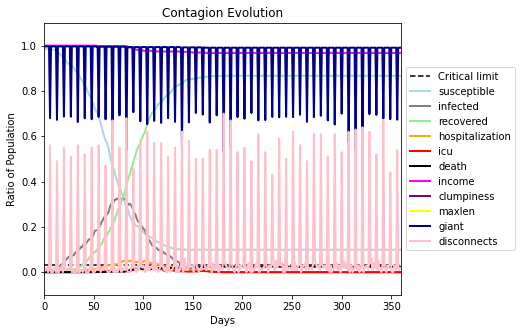

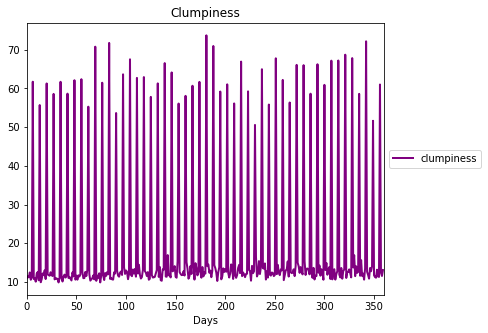

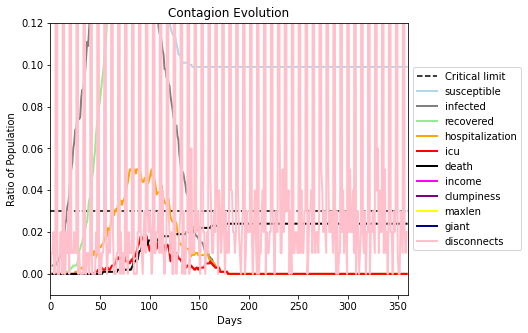

In [14]:
import logging
def setLevel(level):
    logger1 = logging.getLogger()
    logger1.setLevel(level)
params.params['temperature'] = -0.991
seeds = [9675]
setLevel(logging.CRITICAL)
multiple_runs(params,population_size,simulation_cycles,num_runs= num_runs,fname = run_prefix+"T-.991", 
              do_print = True, 
              home_grid_height = 8, home_grid_width = 10, school_home_list = 

[
[
(0,0),(0,1),(0,2),(0,3),(0,4),
(0,5),(0,6),(0,7),(0,8),(0,9),
(1,0),(1,1),(1,2),(1,3),(1,4),
(1,5),(1,6),(1,7),(1,8),(1,9)],
[
(2,0),(2,1),(2,2),(2,3),(2,4),
(2,5),(2,6),(2,7),(2,8),(2,9),
(3,0),(3,1),(3,2),(3,3),(3,4),
(3,5),(3,6),(3,7),(3,8),(3,9)],
[
(4,0),(4,1),(4,2),(4,3),(4,4),
(4,5),(4,6),(4,7),(4,8),(4,9),
(5,0),(5,1),(5,2),(5,3),(5,4),
(5,5),(5,6),(5,7),(5,8),(5,9)],
[
(6,0),(6,1),(6,2),(6,3),(6,4),
(6,5),(6,6),(6,7),(6,8),(6,9),
(7,0),(7,1),(7,2),(7,3),(7,4),
(7,5),(7,6),(7,7),(7,8),(7,9)]
]

,work_home_list =     
[
[
(0,0),(0,1),(0,2),(0,3),(0,4),
(0,5),(0,6),(0,7),(0,8),(0,9),
(1,0),(1,1),(1,2),(1,3),(1,4),
(1,5),(1,6),(1,7),(1,8),(1,9),

(2,0),(2,1),(2,2),(2,3),(2,4),
(2,5),(2,6),(2,7),(2,8),(2,9),
(3,0),(3,1),(3,2),(3,3),(3,4),
(3,5),(3,6),(3,7),(3,8),(3,9),


(4,0),(4,1),(4,2),(4,3),(4,4),
(4,5),(4,6),(4,7),(4,8),(4,9),
(5,0),(5,1),(5,2),(5,3),(5,4),
(5,5),(5,6),(5,7),(5,8),(5,9),

(6,0),(6,1),(6,2),(6,3),(6,4),
(6,5),(6,6),(6,7),(6,8),(6,9),
(7,0),(7,1),(7,2),(7,3),(7,4),
(7,5),(7,6),(7,7),(7,8),(7,9)
]

],listeners = listeners, compute_hoprank = compute_hoprank )


Save these seeds if you want to rerun a scenario
[3150]
Average similarity between family members is 0.9825283500252338 at temperature -0.99
Average similarity between family and home is 0.9998996633658269 at temperature -1
Average similarity between students and their classroom is 0.46528524793894993 at temperature -0.99
Average classroom occupancy is 11.916666666666666 and number classrooms is 24
Average similarity between workers is 0.8640257840802517 at temperature -0.99
Average office occupancy is 10.045454545454545 and number offices is 66
Average friend similarity for adults: 0.937443393918863 for kids: 0.6632787377011087
home_districts
[
Home (0,0) district with 1 Buildings
HomogeneousBuilding: 20 units (each with capacity for 5 people.) 2 allocated units with a total of 8 people.
Total of 8 people allocated in this district.
, 
Home (1,0) district with 1 Buildings
HomogeneousBuilding: 20 units (each with capacity for 5 people.) 3 allocated units with a total of 9 people.
Total

run with seed 3150:
avg restaurant similarity 0.329440498049603
clumpiness 10.27
maxlen 18
giant component 1.0
disconnects 0.0
avg restaurant similarity 0.17592931384067176
clumpiness 11.03
maxlen 19
giant component 1.0
disconnects 0.0
avg restaurant similarity 0.22574344070941194
clumpiness 10.56
maxlen 20
giant component 1.0
disconnects 0.0
avg restaurant similarity 0.16026849058917056
clumpiness 11.33
maxlen 18
giant component 1.0
disconnects 0.0
avg restaurant similarity 0.2278697056573541
clumpiness 10.44
maxlen 18
giant component 1.0
disconnects 0.0
avg restaurant similarity 0.3868635971027453
clumpiness 11.4
maxlen 17
giant component 1.0
disconnects 0.0
avg restaurant similarity 0.10992278619914224
clumpiness 58.74
maxlen 29
giant component 0.7138728323699421
disconnects 0.52
avg restaurant similarity 0.25549023965156203
clumpiness 10.31
maxlen 18
giant component 1.0
disconnects 0.0
avg restaurant similarity 0.3709400261730114
clumpiness 10.65
maxlen 19
giant component 1.0
disco

avg restaurant similarity 0.1632102682653359
clumpiness 10.6
maxlen 17
giant component 1.0
disconnects 0.0
avg restaurant similarity 0.1887974448406331
clumpiness 10.69
maxlen 18
giant component 1.0
disconnects 0.0
avg restaurant similarity 0.09483994835350402
clumpiness 70.85
maxlen 25
giant component 0.5636758321273516
disconnects 0.67
avg restaurant similarity 0.1883224065049709
clumpiness 11.12
maxlen 18
giant component 1.0
disconnects 0.0
avg restaurant similarity 0.08012492489880944
clumpiness 10.79
maxlen 19
giant component 1.0
disconnects 0.0
avg restaurant similarity 0.15176553580438565
clumpiness 10.51
maxlen 18
giant component 1.0
disconnects 0.0
avg restaurant similarity 0.0978395039571936
clumpiness 11.23
maxlen 20
giant component 1.0
disconnects 0.0
avg restaurant similarity 0.13327847663417638
clumpiness 10.69
maxlen 19
giant component 1.0
disconnects 0.0
avg restaurant similarity 0.1270807829080366
clumpiness 10.89
maxlen 23
giant component 1.0
disconnects 0.0
avg resta

clumpiness 55.14
maxlen 23
giant component 0.7203757225433526
disconnects 0.48
avg restaurant similarity 0.17967950815441344
clumpiness 11.33
maxlen 18
giant component 0.9986206896551724
disconnects 0.0
avg restaurant similarity 0.5072376595485509
clumpiness 10.74
maxlen 18
giant component 0.9986206896551724
disconnects 0.0
avg restaurant similarity 0.306302142388399
clumpiness 10.88
maxlen 18
giant component 0.9986206896551724
disconnects 0.0
avg restaurant similarity 0.37082375218797814
clumpiness 11.28
maxlen 19
giant component 0.9986206896551724
disconnects 0.0
avg restaurant similarity 0.3426249778250068
clumpiness 11.54
maxlen 19
giant component 0.9986206896551724
disconnects 0.01
avg restaurant similarity 0.29522275197320097
clumpiness 10.68
maxlen 19
giant component 0.9986206896551724
disconnects 0.0
avg restaurant similarity 0.2054388473771948
clumpiness 60.41
maxlen 27
giant component 0.7124277456647399
disconnects 0.54
avg restaurant similarity 0.2600967698889124
clumpiness 

avg restaurant similarity 0.3042675865076239
clumpiness 10.44
maxlen 17
giant component 0.9986206896551724
disconnects 0.0
avg restaurant similarity 0.28300641865643267
clumpiness 11.55
maxlen 18
giant component 0.9986206896551724
disconnects 0.0
avg restaurant similarity 0.21103034899972475
clumpiness 10.61
maxlen 19
giant component 0.9986206896551724
disconnects 0.0
avg restaurant similarity 0.33460018608555653
clumpiness 52.74
maxlen 29
giant component 0.7167630057803468
disconnects 0.43
avg restaurant similarity 0.2595292202191277
clumpiness 11.82
maxlen 16
giant component 0.9986206896551724
disconnects 0.02
avg restaurant similarity 0.28692700973739843
clumpiness 10.9
maxlen 19
giant component 0.9986206896551724
disconnects 0.0
avg restaurant similarity 0.313117630563082
clumpiness 10.97
maxlen 19
giant component 0.9986206896551724
disconnects 0.0
avg restaurant similarity 0.2585432774368328
clumpiness 11.04
maxlen 19
giant component 0.9986206896551724
disconnects 0.0
avg restaura

clumpiness 52.1
maxlen 30
giant component 0.7117052023121387
disconnects 0.44
avg restaurant similarity 0.21694016213184425
clumpiness 11.29
maxlen 21
giant component 0.9986206896551724
disconnects 0.0
avg restaurant similarity 0.3367453510329747
clumpiness 10.55
maxlen 21
giant component 0.9986206896551724
disconnects 0.0
avg restaurant similarity 0.4418092026490203
clumpiness 10.67
maxlen 22
giant component 0.9986206896551724
disconnects 0.0
avg restaurant similarity 0.3057615650136302
clumpiness 12.62
maxlen 18
giant component 0.9986206896551724
disconnects 0.02
avg restaurant similarity 0.24324104130713034
clumpiness 11.2
maxlen 21
giant component 0.9986206896551724
disconnects 0.0
avg restaurant similarity 0.24688945457100397
clumpiness 11.44
maxlen 19
giant component 0.9986206896551724
disconnects 0.0
avg restaurant similarity 0.3085927370406081
clumpiness 53.72
maxlen 21
giant component 0.7225433526011561
disconnects 0.47
avg restaurant similarity 0.3790519582160732
clumpiness 1

avg restaurant similarity 0.1828874820009325
clumpiness 10.77
maxlen 18
giant component 0.9986206896551724
disconnects 0.0
avg restaurant similarity 0.33222544785278957
clumpiness 10.93
maxlen 17
giant component 0.9986206896551724
disconnects 0.0
avg restaurant similarity 0.27169261767167097
clumpiness 12.04
maxlen 19
giant component 0.9986206896551724
disconnects 0.01
avg restaurant similarity 0.37757733278776073
clumpiness 70.89
maxlen 21
giant component 0.5715317919075145
disconnects 0.67
avg restaurant similarity 0.42893769914678964
clumpiness 10.51
maxlen 17
giant component 0.9986206896551724
disconnects 0.0
avg restaurant similarity 0.323034667964197
clumpiness 10.39
maxlen 18
giant component 0.9986206896551724
disconnects 0.0
avg restaurant similarity 0.25807611682154197
clumpiness 11.0
maxlen 18
giant component 0.9986206896551724
disconnects 0.0
avg restaurant similarity 0.26676326743889844
clumpiness 11.07
maxlen 17
giant component 0.9986206896551724
disconnects 0.01
avg resta

(<function dict.items>, <function dict.items>, <function dict.items>)

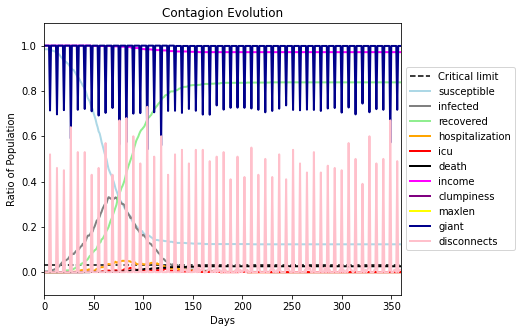

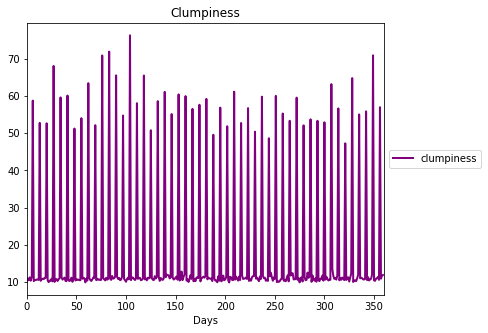

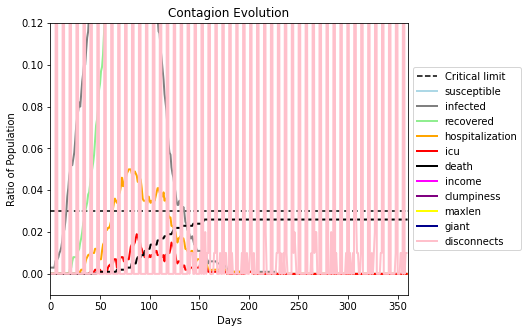

In [15]:
import logging
def setLevel(level):
    logger1 = logging.getLogger()
    logger1.setLevel(level)
params.params['temperature'] = -0.99
seeds = [9675]
setLevel(logging.CRITICAL)
multiple_runs(params,population_size,simulation_cycles,num_runs= num_runs,fname = run_prefix+"T-.99", 
              do_print = True, 
              home_grid_height = 8, home_grid_width = 10, school_home_list = 

[
[
(0,0),(0,1),(0,2),(0,3),(0,4),
(0,5),(0,6),(0,7),(0,8),(0,9),
(1,0),(1,1),(1,2),(1,3),(1,4),
(1,5),(1,6),(1,7),(1,8),(1,9)],
[
(2,0),(2,1),(2,2),(2,3),(2,4),
(2,5),(2,6),(2,7),(2,8),(2,9),
(3,0),(3,1),(3,2),(3,3),(3,4),
(3,5),(3,6),(3,7),(3,8),(3,9)],
[
(4,0),(4,1),(4,2),(4,3),(4,4),
(4,5),(4,6),(4,7),(4,8),(4,9),
(5,0),(5,1),(5,2),(5,3),(5,4),
(5,5),(5,6),(5,7),(5,8),(5,9)],
[
(6,0),(6,1),(6,2),(6,3),(6,4),
(6,5),(6,6),(6,7),(6,8),(6,9),
(7,0),(7,1),(7,2),(7,3),(7,4),
(7,5),(7,6),(7,7),(7,8),(7,9)]
]

,work_home_list =     
[
[
(0,0),(0,1),(0,2),(0,3),(0,4),
(0,5),(0,6),(0,7),(0,8),(0,9),
(1,0),(1,1),(1,2),(1,3),(1,4),
(1,5),(1,6),(1,7),(1,8),(1,9),

(2,0),(2,1),(2,2),(2,3),(2,4),
(2,5),(2,6),(2,7),(2,8),(2,9),
(3,0),(3,1),(3,2),(3,3),(3,4),
(3,5),(3,6),(3,7),(3,8),(3,9),


(4,0),(4,1),(4,2),(4,3),(4,4),
(4,5),(4,6),(4,7),(4,8),(4,9),
(5,0),(5,1),(5,2),(5,3),(5,4),
(5,5),(5,6),(5,7),(5,8),(5,9),

(6,0),(6,1),(6,2),(6,3),(6,4),
(6,5),(6,6),(6,7),(6,8),(6,9),
(7,0),(7,1),(7,2),(7,3),(7,4),
(7,5),(7,6),(7,7),(7,8),(7,9)
]

],listeners = listeners, compute_hoprank = compute_hoprank )


Save these seeds if you want to rerun a scenario
[7927]
Average similarity between family members is 0.9527263277615524 at temperature -0.98
Average similarity between family and home is 0.9999088800519236 at temperature -1
Average similarity between students and their classroom is 0.3691300019502988 at temperature -0.98
Average classroom occupancy is 11.375 and number classrooms is 24
Average similarity between workers is 0.7325241773895774 at temperature -0.98
Average office occupancy is 10.393939393939394 and number offices is 66
Average friend similarity for adults: 0.8574234868078068 for kids: 0.5850163992298576
home_districts
[
Home (0,0) district with 1 Buildings
HomogeneousBuilding: 20 units (each with capacity for 5 people.) 1 allocated units with a total of 2 people.
Total of 2 people allocated in this district.
, 
Home (1,0) district with 1 Buildings
HomogeneousBuilding: 20 units (each with capacity for 5 people.) 2 allocated units with a total of 4 people.
Total of 4 people

run with seed 7927:
avg restaurant similarity 0.3396539439945883
clumpiness 10.04
maxlen 15
giant component 1.0
disconnects 0.0
avg restaurant similarity 0.3292771665349409
clumpiness 10.14
maxlen 16
giant component 1.0
disconnects 0.0
avg restaurant similarity 0.16000759125095926
clumpiness 9.52
maxlen 16
giant component 1.0
disconnects 0.0
avg restaurant similarity 0.1432981080171178
clumpiness 9.53
maxlen 16
giant component 1.0
disconnects 0.0
avg restaurant similarity 0.3579908150263488
clumpiness 9.25
maxlen 14
giant component 1.0
disconnects 0.0
avg restaurant similarity 0.334193133901365
clumpiness 10.21
maxlen 17
giant component 1.0
disconnects 0.0
avg restaurant similarity 0.3315903671053811
clumpiness 69.05
maxlen 25
giant component 0.6640457469621158
disconnects 0.64
avg restaurant similarity 0.45448232456053256
clumpiness 10.01
maxlen 15
giant component 1.0
disconnects 0.0
avg restaurant similarity 0.15937194019229925
clumpiness 9.75
maxlen 17
giant component 1.0
disconnect

clumpiness 9.94
maxlen 18
giant component 1.0
disconnects 0.0
avg restaurant similarity 0.25452952303742643
clumpiness 9.97
maxlen 16
giant component 1.0
disconnects 0.0
avg restaurant similarity 0.29701106478270833
clumpiness 58.66
maxlen 27
giant component 0.6761972837741244
disconnects 0.52
avg restaurant similarity 0.14790668770686263
clumpiness 10.04
maxlen 18
giant component 1.0
disconnects 0.0
avg restaurant similarity 0.21072992942404314
clumpiness 9.89
maxlen 16
giant component 0.9986348122866894
disconnects 0.0
avg restaurant similarity 0.20449603381549253
clumpiness 10.25
maxlen 17
giant component 0.9986348122866894
disconnects 0.0
avg restaurant similarity 0.21861802474877426
clumpiness 9.61
maxlen 16
giant component 0.9986348122866894
disconnects 0.0
avg restaurant similarity 0.33253625440688284
clumpiness 10.21
maxlen 16
giant component 0.9986348122866894
disconnects 0.0
avg restaurant similarity 0.33248376199231033
clumpiness 10.46
maxlen 15
giant component 0.99863481228

clumpiness 10.9
maxlen 16
giant component 0.995221843003413
disconnects 0.01
avg restaurant similarity 0.11543203448818974
clumpiness 10.14
maxlen 16
giant component 0.995221843003413
disconnects 0.0
avg restaurant similarity 0.3738102576162613
clumpiness 10.04
maxlen 21
giant component 0.995221843003413
disconnects 0.0
avg restaurant similarity 0.37310949446421315
clumpiness 13.41
maxlen 19
giant component 0.995221843003413
disconnects 0.04
avg restaurant similarity 0.20192073493431412
clumpiness 11.95
maxlen 16
giant component 0.995221843003413
disconnects 0.02
avg restaurant similarity 0.4930054746341703
clumpiness 64.01
maxlen 30
giant component 0.6726233023588277
disconnects 0.56
avg restaurant similarity 0.22241094375648554
clumpiness 9.96
maxlen 16
giant component 0.995221843003413
disconnects 0.0
avg restaurant similarity 0.48128686735094567
clumpiness 10.97
maxlen 17
giant component 0.995221843003413
disconnects 0.01
avg restaurant similarity 0.4953241528216276
clumpiness 10.6

avg restaurant similarity 0.012346900265156854
clumpiness 10.04
maxlen 19
giant component 0.995221843003413
disconnects 0.0
avg restaurant similarity 0.34265686848336313
clumpiness 59.94
maxlen 30
giant component 0.6619013581129378
disconnects 0.54
avg restaurant similarity 0.23593109060084508
clumpiness 11.93
maxlen 18
giant component 0.995221843003413
disconnects 0.02
avg restaurant similarity 0.35653966898746997
clumpiness 11.07
maxlen 16
giant component 0.995221843003413
disconnects 0.01
avg restaurant similarity 0.32711960539519574
clumpiness 10.75
maxlen 14
giant component 0.995221843003413
disconnects 0.01
avg restaurant similarity 0.4196618085073423
clumpiness 9.99
maxlen 16
giant component 0.995221843003413
disconnects 0.0
avg restaurant similarity 0.33302333343017315
clumpiness 10.52
maxlen 17
giant component 0.995221843003413
disconnects 0.01
avg restaurant similarity 0.4158094651626292
clumpiness 10.75
maxlen 18
giant component 0.995221843003413
disconnects 0.01
avg restaur

avg restaurant similarity 0.27343646051623594
clumpiness 10.98
maxlen 17
giant component 0.995221843003413
disconnects 0.01
avg restaurant similarity 0.3603395419450629
clumpiness 12.78
maxlen 17
giant component 0.995221843003413
disconnects 0.03
avg restaurant similarity 0.1388813057679886
clumpiness 9.63
maxlen 19
giant component 0.995221843003413
disconnects 0.0
avg restaurant similarity 0.42792822618161946
clumpiness 11.24
maxlen 18
giant component 0.995221843003413
disconnects 0.01
avg restaurant similarity 0.3184185701138778
clumpiness 70.59
maxlen 23
giant component 0.536097212294496
disconnects 0.66
avg restaurant similarity 0.16690191734943824
clumpiness 9.96
maxlen 17
giant component 0.995221843003413
disconnects 0.0
avg restaurant similarity 0.32206401182436895
clumpiness 11.91
maxlen 18
giant component 0.995221843003413
disconnects 0.02
avg restaurant similarity 0.22494871989234924
clumpiness 10.26
maxlen 15
giant component 0.995221843003413
disconnects 0.0
avg restaurant s

avg restaurant similarity 0.16481576701239528
clumpiness 58.28
maxlen 35
giant component 0.6611865618298784
disconnects 0.5
avg restaurant similarity 0.06188573623323383
clumpiness 11.52
maxlen 17
giant component 0.995221843003413
disconnects 0.01
avg restaurant similarity 0.33534546140719457
clumpiness 11.66
maxlen 17
giant component 0.995221843003413
disconnects 0.02
avg restaurant similarity 0.09660746476736098
clumpiness 9.82
maxlen 15
giant component 0.995221843003413
disconnects 0.0
avg restaurant similarity 0.11820545407631025
clumpiness 11.83
maxlen 17
giant component 0.995221843003413
disconnects 0.02
avg restaurant similarity 0.09876800159416975
clumpiness 13.45
maxlen 18
giant component 0.995221843003413
disconnects 0.03
avg restaurant similarity 0.2051629872287992
clumpiness 11.9
maxlen 18
giant component 0.995221843003413
disconnects 0.02
avg restaurant similarity 0.0382620772866614
clumpiness 77.09
maxlen 23
giant component 0.538241601143674
disconnects 0.74
avg restauran

(<function dict.items>, <function dict.items>, <function dict.items>)

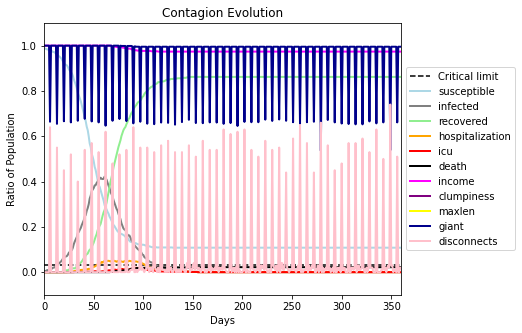

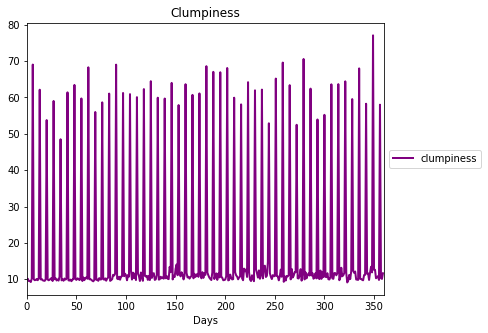

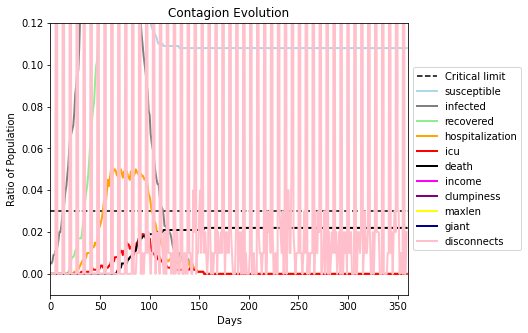

In [16]:
import logging
def setLevel(level):
    logger1 = logging.getLogger()
    logger1.setLevel(level)
params.params['temperature'] = -0.98
seeds = [9675]
setLevel(logging.CRITICAL)
multiple_runs(params,population_size,simulation_cycles,num_runs= num_runs,fname = run_prefix+"T-.989", 
              do_print = True, 
              home_grid_height = 8, home_grid_width = 10, school_home_list = 

[
[
(0,0),(0,1),(0,2),(0,3),(0,4),
(0,5),(0,6),(0,7),(0,8),(0,9),
(1,0),(1,1),(1,2),(1,3),(1,4),
(1,5),(1,6),(1,7),(1,8),(1,9)],
[
(2,0),(2,1),(2,2),(2,3),(2,4),
(2,5),(2,6),(2,7),(2,8),(2,9),
(3,0),(3,1),(3,2),(3,3),(3,4),
(3,5),(3,6),(3,7),(3,8),(3,9)],
[
(4,0),(4,1),(4,2),(4,3),(4,4),
(4,5),(4,6),(4,7),(4,8),(4,9),
(5,0),(5,1),(5,2),(5,3),(5,4),
(5,5),(5,6),(5,7),(5,8),(5,9)],
[
(6,0),(6,1),(6,2),(6,3),(6,4),
(6,5),(6,6),(6,7),(6,8),(6,9),
(7,0),(7,1),(7,2),(7,3),(7,4),
(7,5),(7,6),(7,7),(7,8),(7,9)]
]

,work_home_list =     
[
[
(0,0),(0,1),(0,2),(0,3),(0,4),
(0,5),(0,6),(0,7),(0,8),(0,9),
(1,0),(1,1),(1,2),(1,3),(1,4),
(1,5),(1,6),(1,7),(1,8),(1,9),

(2,0),(2,1),(2,2),(2,3),(2,4),
(2,5),(2,6),(2,7),(2,8),(2,9),
(3,0),(3,1),(3,2),(3,3),(3,4),
(3,5),(3,6),(3,7),(3,8),(3,9),


(4,0),(4,1),(4,2),(4,3),(4,4),
(4,5),(4,6),(4,7),(4,8),(4,9),
(5,0),(5,1),(5,2),(5,3),(5,4),
(5,5),(5,6),(5,7),(5,8),(5,9),

(6,0),(6,1),(6,2),(6,3),(6,4),
(6,5),(6,6),(6,7),(6,8),(6,9),
(7,0),(7,1),(7,2),(7,3),(7,4),
(7,5),(7,6),(7,7),(7,8),(7,9)
]

],listeners = listeners, compute_hoprank = compute_hoprank )


Save these seeds if you want to rerun a scenario
[8948]
Average similarity between family members is 0.9334846964642536 at temperature -0.97
Average similarity between family and home is 0.9998978708757035 at temperature -1
Average similarity between students and their classroom is 0.3541934016402629 at temperature -0.97
Average classroom occupancy is 11.083333333333334 and number classrooms is 24
Average similarity between workers is 0.6576839053964586 at temperature -0.97
Average office occupancy is 10.196969696969697 and number offices is 66
Average friend similarity for adults: 0.8112773131019224 for kids: 0.5593385266759684
home_districts
[
Home (0,0) district with 1 Buildings
HomogeneousBuilding: 20 units (each with capacity for 5 people.) 1 allocated units with a total of 3 people.
Total of 3 people allocated in this district.
, 
Home (1,0) district with 1 Buildings
HomogeneousBuilding: 20 units (each with capacity for 5 people.) 0 allocated units with a total of 0 people.
Total

avg restaurant similarity 0.04336349423556408
clumpiness 8.81
maxlen 13
giant component 0.9986282578875172
disconnects 0.0
avg restaurant similarity 0.11199905907657935
clumpiness 9.29
maxlen 15
giant component 0.9986282578875172
disconnects 0.0
avg restaurant similarity 0.054101999376443034
clumpiness 9.43
maxlen 18
giant component 0.9986282578875172
disconnects 0.0
avg restaurant similarity -0.05205528479904249
clumpiness 9.31
maxlen 16
giant component 0.9986282578875172
disconnects 0.0
avg restaurant similarity 0.11548613309868559
clumpiness 9.67
maxlen 15
giant component 0.9986282578875172
disconnects 0.0
avg restaurant similarity 0.25291437400387373
clumpiness 9.38
maxlen 13
giant component 0.9986282578875172
disconnects 0.0
avg restaurant similarity 0.05738909498955687
clumpiness 55.73
maxlen 18
giant component 0.6867816091954023
disconnects 0.5
avg restaurant similarity 0.2334405406088199
clumpiness 9.06
maxlen 17
giant component 0.9986282578875172
disconnects 0.0
avg restaurant

avg restaurant similarity 0.13279159119128464
clumpiness 10.4
maxlen 16
giant component 0.9986282578875172
disconnects 0.01
avg restaurant similarity 0.09297760675903047
clumpiness 10.19
maxlen 16
giant component 0.9986282578875172
disconnects 0.01
avg restaurant similarity 0.14606874490756466
clumpiness 58.59
maxlen 20
giant component 0.6860632183908046
disconnects 0.53
avg restaurant similarity -0.03290907379706113
clumpiness 9.29
maxlen 14
giant component 0.9986282578875172
disconnects 0.0
avg restaurant similarity 0.2985205093704071
clumpiness 9.0
maxlen 13
giant component 0.9986282578875172
disconnects 0.0
avg restaurant similarity 0.06863637146547723
clumpiness 10.01
maxlen 14
giant component 0.9986282578875172
disconnects 0.01
avg restaurant similarity 0.11641829680291206
clumpiness 9.53
maxlen 14
giant component 0.9986282578875172
disconnects 0.0
avg restaurant similarity 0.1022843688286279
clumpiness 10.46
maxlen 15
giant component 0.9986282578875172
disconnects 0.01
avg resta

avg restaurant similarity -0.06673996777889009
clumpiness 9.11
maxlen 15
giant component 0.9986282578875172
disconnects 0.0
avg restaurant similarity -0.026573952283708742
clumpiness 9.31
maxlen 15
giant component 0.9986282578875172
disconnects 0.0
avg restaurant similarity 0.0733987495299081
clumpiness 11.32
maxlen 15
giant component 0.9986282578875172
disconnects 0.02
avg restaurant similarity 0.23653801228681187
clumpiness 9.59
maxlen 15
giant component 0.9986282578875172
disconnects 0.0
avg restaurant similarity 0.02669673688330566
clumpiness 9.31
maxlen 14
giant component 0.9986282578875172
disconnects 0.0
avg restaurant similarity 0.20319913520245897
clumpiness 56.32
maxlen 20
giant component 0.7040229885057471
disconnects 0.5
avg restaurant similarity 0.1435003572627225
clumpiness 10.22
maxlen 14
giant component 0.9986282578875172
disconnects 0.01
avg restaurant similarity 0.05876429257346334
clumpiness 9.05
maxlen 15
giant component 0.9986282578875172
disconnects 0.0
avg restau

clumpiness 10.49
maxlen 16
giant component 0.9986282578875172
disconnects 0.01
avg restaurant similarity 0.07266306050403312
clumpiness 9.24
maxlen 15
giant component 0.9986282578875172
disconnects 0.0
avg restaurant similarity 0.21517052416141594
clumpiness 56.53
maxlen 22
giant component 0.6889367816091954
disconnects 0.51
avg restaurant similarity 0.2160140455338132
clumpiness 10.17
maxlen 14
giant component 0.9986282578875172
disconnects 0.01
avg restaurant similarity 0.1855061256715496
clumpiness 9.49
maxlen 15
giant component 0.9986282578875172
disconnects 0.0
avg restaurant similarity 0.1529647148922484
clumpiness 9.53
maxlen 15
giant component 0.9986282578875172
disconnects 0.0
avg restaurant similarity 0.03949424764933995
clumpiness 8.9
maxlen 15
giant component 0.9986282578875172
disconnects 0.0
avg restaurant similarity 0.035867526891144676
clumpiness 9.59
maxlen 15
giant component 0.9986282578875172
disconnects 0.0
avg restaurant similarity 0.02631922823884893
clumpiness 9.

avg restaurant similarity 0.1042117384458983
clumpiness 9.44
maxlen 14
giant component 0.9986282578875172
disconnects 0.0
avg restaurant similarity 0.198966322628558
clumpiness 9.51
maxlen 15
giant component 0.9986282578875172
disconnects 0.0
avg restaurant similarity 0.19427879766600814
clumpiness 9.02
maxlen 14
giant component 0.9986282578875172
disconnects 0.0
avg restaurant similarity 0.2779922935771682
clumpiness 10.11
maxlen 14
giant component 0.9986282578875172
disconnects 0.01
avg restaurant similarity 0.1841176811951008
clumpiness 9.3
maxlen 14
giant component 0.9986282578875172
disconnects 0.0
avg restaurant similarity 0.0624180864554357
clumpiness 56.79
maxlen 20
giant component 0.6918103448275862
disconnects 0.51
avg restaurant similarity 0.17186129160358804
clumpiness 9.52
maxlen 15
giant component 0.9986282578875172
disconnects 0.0
avg restaurant similarity 0.2986951665333501
clumpiness 9.39
maxlen 16
giant component 0.9986282578875172
disconnects 0.0
avg restaurant simil

avg restaurant similarity 0.15643885405530109
clumpiness 9.4
maxlen 13
giant component 0.9986282578875172
disconnects 0.0
avg restaurant similarity 0.02635889889587915
clumpiness 51.26
maxlen 20
giant component 0.6831896551724138
disconnects 0.45
avg restaurant similarity 0.21278222596217625
clumpiness 9.27
maxlen 18
giant component 0.9986282578875172
disconnects 0.0
avg restaurant similarity 0.14039611606830402
clumpiness 9.72
maxlen 15
giant component 0.9986282578875172
disconnects 0.0
avg restaurant similarity 0.037563573780691875
clumpiness 10.27
maxlen 14
giant component 0.9986282578875172
disconnects 0.01
avg restaurant similarity 0.21804912801139567
clumpiness 10.19
maxlen 16
giant component 0.9986282578875172
disconnects 0.01
avg restaurant similarity 0.18262885737583384
clumpiness 9.86
maxlen 15
giant component 0.9986282578875172
disconnects 0.0
avg restaurant similarity 0.146869546304764
clumpiness 9.24
maxlen 14
giant component 0.9986282578875172
disconnects 0.0
avg restaura

(<function dict.items>, <function dict.items>, <function dict.items>)

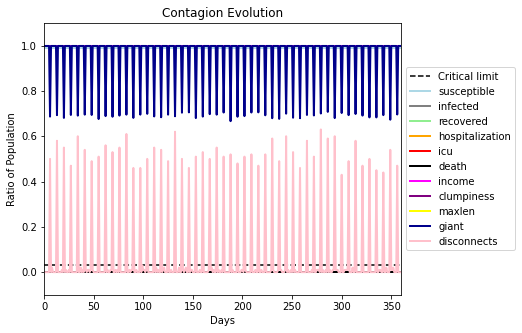

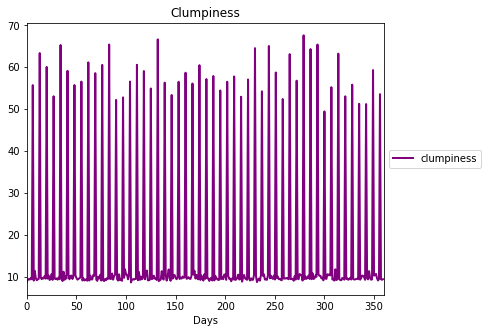

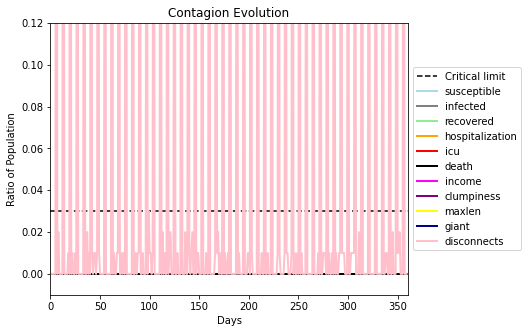

In [17]:
import logging
def setLevel(level):
    logger1 = logging.getLogger()
    logger1.setLevel(level)
params.params['temperature'] = -0.97
seeds = [9675]
setLevel(logging.CRITICAL)
multiple_runs(params,population_size,simulation_cycles,num_runs= num_runs,fname = run_prefix+"T-.97", 
              do_print = True, 
              home_grid_height = 8, home_grid_width = 10, school_home_list = 

[
[
(0,0),(0,1),(0,2),(0,3),(0,4),
(0,5),(0,6),(0,7),(0,8),(0,9),
(1,0),(1,1),(1,2),(1,3),(1,4),
(1,5),(1,6),(1,7),(1,8),(1,9)],
[
(2,0),(2,1),(2,2),(2,3),(2,4),
(2,5),(2,6),(2,7),(2,8),(2,9),
(3,0),(3,1),(3,2),(3,3),(3,4),
(3,5),(3,6),(3,7),(3,8),(3,9)],
[
(4,0),(4,1),(4,2),(4,3),(4,4),
(4,5),(4,6),(4,7),(4,8),(4,9),
(5,0),(5,1),(5,2),(5,3),(5,4),
(5,5),(5,6),(5,7),(5,8),(5,9)],
[
(6,0),(6,1),(6,2),(6,3),(6,4),
(6,5),(6,6),(6,7),(6,8),(6,9),
(7,0),(7,1),(7,2),(7,3),(7,4),
(7,5),(7,6),(7,7),(7,8),(7,9)]
]

,work_home_list =     
[
[
(0,0),(0,1),(0,2),(0,3),(0,4),
(0,5),(0,6),(0,7),(0,8),(0,9),
(1,0),(1,1),(1,2),(1,3),(1,4),
(1,5),(1,6),(1,7),(1,8),(1,9),

(2,0),(2,1),(2,2),(2,3),(2,4),
(2,5),(2,6),(2,7),(2,8),(2,9),
(3,0),(3,1),(3,2),(3,3),(3,4),
(3,5),(3,6),(3,7),(3,8),(3,9),


(4,0),(4,1),(4,2),(4,3),(4,4),
(4,5),(4,6),(4,7),(4,8),(4,9),
(5,0),(5,1),(5,2),(5,3),(5,4),
(5,5),(5,6),(5,7),(5,8),(5,9),

(6,0),(6,1),(6,2),(6,3),(6,4),
(6,5),(6,6),(6,7),(6,8),(6,9),
(7,0),(7,1),(7,2),(7,3),(7,4),
(7,5),(7,6),(7,7),(7,8),(7,9)
]

],listeners = listeners, compute_hoprank = compute_hoprank )


Save these seeds if you want to rerun a scenario
[4230]
Average similarity between family members is 0.0344368495014183 at temperature 1
Average similarity between family and home is 0.9999027040182317 at temperature -1
Average similarity between students and their classroom is 0.07761688873080577 at temperature 1
Average classroom occupancy is 11.75 and number classrooms is 24
Average similarity between workers is 0.01955073855507929 at temperature 1
Average office occupancy is 10 and number offices is 66
Average friend similarity for adults: 0.0895522783839129 for kids: 0.10347453938577064
home_districts
[
Home (0,0) district with 1 Buildings
HomogeneousBuilding: 20 units (each with capacity for 5 people.) 2 allocated units with a total of 5 people.
Total of 5 people allocated in this district.
, 
Home (1,0) district with 1 Buildings
HomogeneousBuilding: 20 units (each with capacity for 5 people.) 3 allocated units with a total of 11 people.
Total of 11 people allocated in this distr

avg restaurant similarity -0.005556366246736156
clumpiness 8.58
maxlen 13
giant component 1.0
disconnects 0.0
avg restaurant similarity 0.082896228486049
clumpiness 8.88
maxlen 13
giant component 1.0
disconnects 0.0
avg restaurant similarity -0.0023599359296321274
clumpiness 9.01
maxlen 14
giant component 1.0
disconnects 0.0
avg restaurant similarity 0.05247321673909591
clumpiness 8.62
maxlen 12
giant component 1.0
disconnects 0.0
avg restaurant similarity 0.05618666823612164
clumpiness 8.87
maxlen 14
giant component 1.0
disconnects 0.0
avg restaurant similarity 0.08716900452940815
clumpiness 9.08
maxlen 13
giant component 1.0
disconnects 0.0
avg restaurant similarity 0.11117127593481606
clumpiness 44.85
maxlen 19
giant component 0.7277335264301231
disconnects 0.38
avg restaurant similarity 0.08486336627607864
clumpiness 8.95
maxlen 13
giant component 1.0
disconnects 0.0
avg restaurant similarity 0.037334224045824586
clumpiness 8.97
maxlen 15
giant component 1.0
disconnects 0.0
avg res

avg restaurant similarity 0.04552261537013392
clumpiness 8.94
maxlen 14
giant component 0.9986178299930891
disconnects 0.0
avg restaurant similarity 0.042748160701348084
clumpiness 9.86
maxlen 14
giant component 0.9986178299930891
disconnects 0.01
avg restaurant similarity 0.10177445463405659
clumpiness 49.44
maxlen 18
giant component 0.7110789283128168
disconnects 0.43
avg restaurant similarity -0.019252424423559684
clumpiness 9.43
maxlen 14
giant component 0.9986178299930891
disconnects 0.0
avg restaurant similarity 0.06361722724929075
clumpiness 8.76
maxlen 14
giant component 0.9986178299930891
disconnects 0.0
avg restaurant similarity 0.06794108952029573
clumpiness 10.01
maxlen 13
giant component 0.9965445749827229
disconnects 0.01
avg restaurant similarity 0.07846486319837685
clumpiness 11.49
maxlen 13
giant component 0.9965445749827229
disconnects 0.03
avg restaurant similarity 0.07122403803043738
clumpiness 10.0
maxlen 15
giant component 0.9965445749827229
disconnects 0.01
avg r

clumpiness 9.16
maxlen 15
giant component 0.9965445749827229
disconnects 0.0
avg restaurant similarity 0.09359784386629577
clumpiness 10.74
maxlen 13
giant component 0.9965445749827229
disconnects 0.02
avg restaurant similarity 0.1169683210137168
clumpiness 9.02
maxlen 13
giant component 0.9965445749827229
disconnects 0.0
avg restaurant similarity 0.03241054596762593
clumpiness 8.93
maxlen 13
giant component 0.9965445749827229
disconnects 0.0
avg restaurant similarity 0.05189036702833823
clumpiness 8.5
maxlen 14
giant component 0.9965445749827229
disconnects 0.0
avg restaurant similarity 0.007162039829430211
clumpiness 10.27
maxlen 14
giant component 0.9965445749827229
disconnects 0.01
avg restaurant similarity 0.05336848821893381
clumpiness 50.5
maxlen 19
giant component 0.7342505430847213
disconnects 0.44
avg restaurant similarity 0.04811480829130524
clumpiness 10.22
maxlen 15
giant component 0.9965445749827229
disconnects 0.01
avg restaurant similarity 0.04491727434618958
clumpiness

avg restaurant similarity 0.08722255584570662
clumpiness 9.85
maxlen 14
giant component 0.9965445749827229
disconnects 0.01
avg restaurant similarity 0.008494331309984095
clumpiness 9.71
maxlen 14
giant component 0.9965445749827229
disconnects 0.01
avg restaurant similarity 0.1446030184294678
clumpiness 48.67
maxlen 23
giant component 0.7299058653149891
disconnects 0.42
avg restaurant similarity 0.03349237778684916
clumpiness 10.1
maxlen 15
giant component 0.9965445749827229
disconnects 0.01
avg restaurant similarity 0.07278213288616735
clumpiness 9.25
maxlen 14
giant component 0.9965445749827229
disconnects 0.0
avg restaurant similarity 0.10007490229621208
clumpiness 10.07
maxlen 15
giant component 0.9965445749827229
disconnects 0.01
avg restaurant similarity 0.05223448025119284
clumpiness 8.84
maxlen 14
giant component 0.9965445749827229
disconnects 0.0
avg restaurant similarity 0.06369165224752782
clumpiness 10.01
maxlen 13
giant component 0.9965445749827229
disconnects 0.01
avg res

avg restaurant similarity 0.04387195691462292
clumpiness 10.98
maxlen 13
giant component 0.9965445749827229
disconnects 0.02
avg restaurant similarity -0.005615983629174079
clumpiness 10.8
maxlen 14
giant component 0.9965445749827229
disconnects 0.02
avg restaurant similarity 0.057444459434938186
clumpiness 9.14
maxlen 15
giant component 0.9965445749827229
disconnects 0.0
avg restaurant similarity 0.014921803513918204
clumpiness 8.84
maxlen 14
giant component 0.9965445749827229
disconnects 0.0
avg restaurant similarity 0.03285332595080537
clumpiness 10.93
maxlen 15
giant component 0.9965445749827229
disconnects 0.02
avg restaurant similarity 0.10105801362089746
clumpiness 9.29
maxlen 14
giant component 0.9965445749827229
disconnects 0.0
avg restaurant similarity 0.0703493179966048
clumpiness 52.34
maxlen 19
giant component 0.718320057929037
disconnects 0.46
avg restaurant similarity 0.09096777414817146
clumpiness 9.18
maxlen 17
giant component 0.9965445749827229
disconnects 0.0
avg res

avg restaurant similarity 0.01647297175633894
clumpiness 9.16
maxlen 13
giant component 0.9965445749827229
disconnects 0.0
avg restaurant similarity 0.005906040790632445
clumpiness 9.32
maxlen 13
giant component 0.9965445749827229
disconnects 0.0
avg restaurant similarity 0.10621663782711079
clumpiness 9.24
maxlen 15
giant component 0.9965445749827229
disconnects 0.0
avg restaurant similarity 0.061163655003188065
clumpiness 51.95
maxlen 19
giant component 0.7132512671976828
disconnects 0.46
avg restaurant similarity 0.10607665555373283
clumpiness 9.05
maxlen 14
giant component 0.9965445749827229
disconnects 0.0
avg restaurant similarity 0.00551280037816833
clumpiness 10.65
maxlen 13
giant component 0.9965445749827229
disconnects 0.02
avg restaurant similarity 0.044722509581132816
clumpiness 11.14
maxlen 17
giant component 0.9965445749827229
disconnects 0.02
avg restaurant similarity 0.059729978781500985
clumpiness 9.57
maxlen 14
giant component 0.9965445749827229
disconnects 0.0
avg re

(<function dict.items>, <function dict.items>, <function dict.items>)

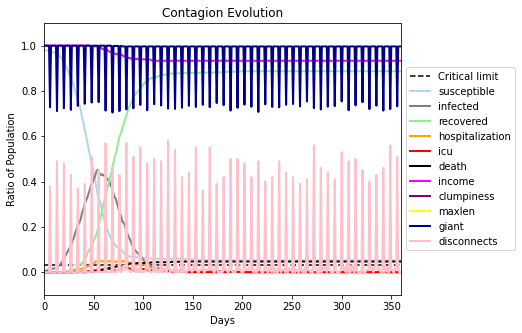

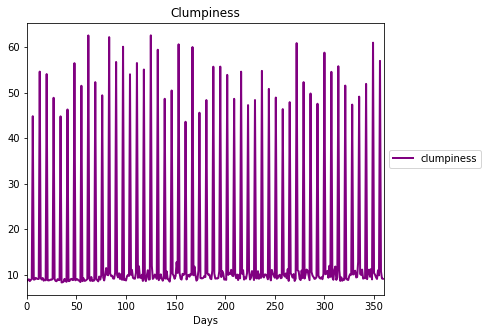

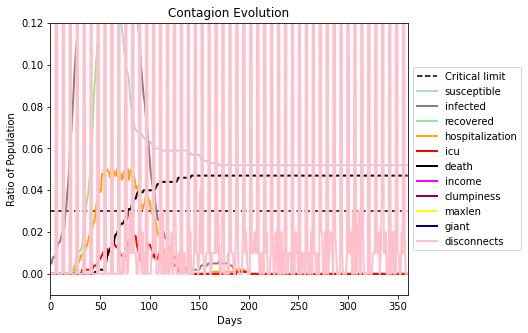

In [18]:
import logging
def setLevel(level):
    logger1 = logging.getLogger()
    logger1.setLevel(level)
params.params['temperature'] = 1
seeds = [9675]
setLevel(logging.CRITICAL)
multiple_runs(params,population_size,simulation_cycles,num_runs= num_runs,fname = run_prefix+"T1", 
              do_print = True, 
              home_grid_height = 8, home_grid_width = 10, school_home_list = 

[
[
(0,0),(0,1),(0,2),(0,3),(0,4),
(0,5),(0,6),(0,7),(0,8),(0,9),
(1,0),(1,1),(1,2),(1,3),(1,4),
(1,5),(1,6),(1,7),(1,8),(1,9)],
[
(2,0),(2,1),(2,2),(2,3),(2,4),
(2,5),(2,6),(2,7),(2,8),(2,9),
(3,0),(3,1),(3,2),(3,3),(3,4),
(3,5),(3,6),(3,7),(3,8),(3,9)],
[
(4,0),(4,1),(4,2),(4,3),(4,4),
(4,5),(4,6),(4,7),(4,8),(4,9),
(5,0),(5,1),(5,2),(5,3),(5,4),
(5,5),(5,6),(5,7),(5,8),(5,9)],
[
(6,0),(6,1),(6,2),(6,3),(6,4),
(6,5),(6,6),(6,7),(6,8),(6,9),
(7,0),(7,1),(7,2),(7,3),(7,4),
(7,5),(7,6),(7,7),(7,8),(7,9)]
]

,work_home_list =     
[
[
(0,0),(0,1),(0,2),(0,3),(0,4),
(0,5),(0,6),(0,7),(0,8),(0,9),
(1,0),(1,1),(1,2),(1,3),(1,4),
(1,5),(1,6),(1,7),(1,8),(1,9),

(2,0),(2,1),(2,2),(2,3),(2,4),
(2,5),(2,6),(2,7),(2,8),(2,9),
(3,0),(3,1),(3,2),(3,3),(3,4),
(3,5),(3,6),(3,7),(3,8),(3,9),


(4,0),(4,1),(4,2),(4,3),(4,4),
(4,5),(4,6),(4,7),(4,8),(4,9),
(5,0),(5,1),(5,2),(5,3),(5,4),
(5,5),(5,6),(5,7),(5,8),(5,9),

(6,0),(6,1),(6,2),(6,3),(6,4),
(6,5),(6,6),(6,7),(6,8),(6,9),
(7,0),(7,1),(7,2),(7,3),(7,4),
(7,5),(7,6),(7,7),(7,8),(7,9)
]

],listeners = listeners, compute_hoprank = compute_hoprank )
